<a href="https://colab.research.google.com/github/dhermawan215/mit-pyhton/blob/main/voice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pydub

In [ ]:
import pydub #library related to audio dubbing
import numpy as np
import matplotlib.pyplot as plt
#import librosa

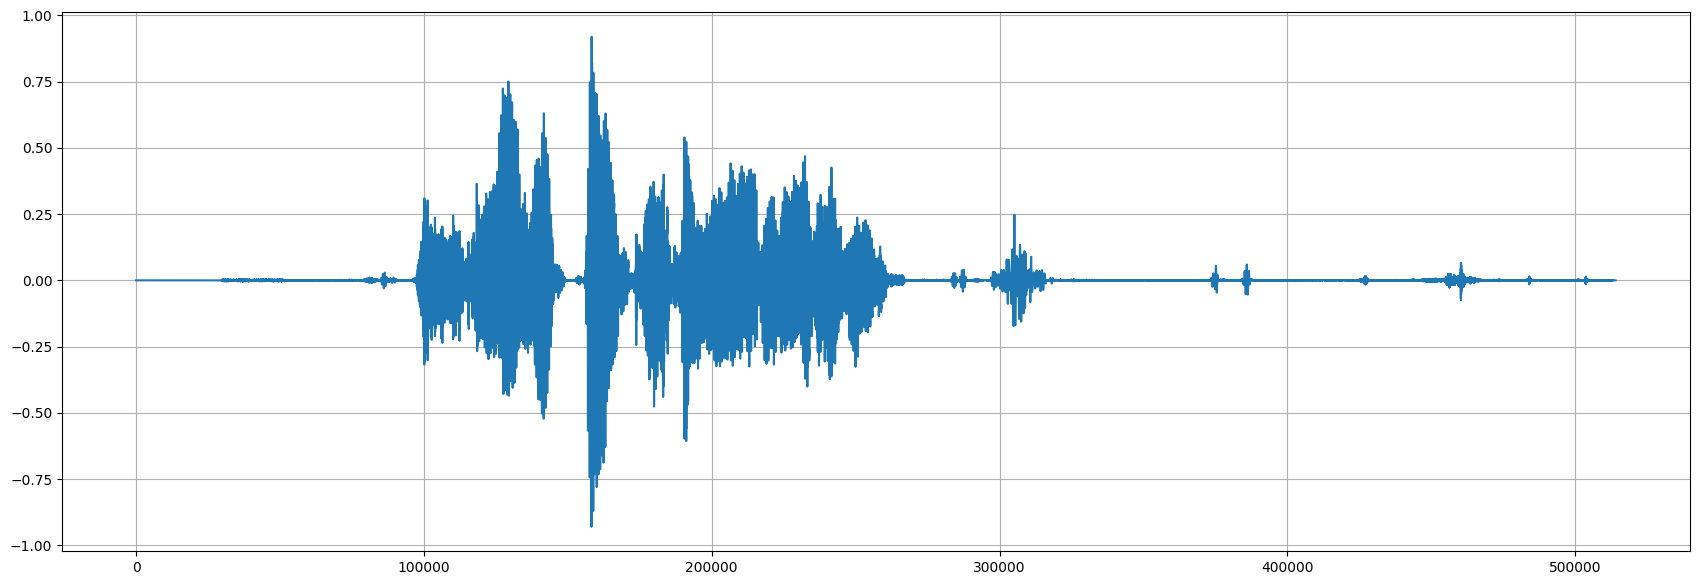

In [ ]:
a = pydub.AudioSegment.from_file('/content/speech1.m4a')
ad = np.array(a.get_array_of_samples())
plt.figure(figsize=[21,7])
if(abs(np.max(ad)>=abs(np.min(ad)))): #normalization
       d1=(ad/np.max(ad))*0.93
else:
       d1=(ad/abs(np.min(ad)))*0.93
plt.plot(d1) #plot the graph
plt.grid() #plot grid
r=[]
# for i in range(256):
#       r.append(0)
# for i in range(len(d1)-512):
#     r.append(np.shape(np.array(np.asarray(librosa.zero_crossings(d1[i:i+512])==True).nonzero()))[1])
# r=r/(np.max(r))-0.5
plt.plot(r) #show to monitor

In [ ]:
plt.figure(figsize=[20,9])
plt.subplot(3,1,3)
plt.plot(d1[90000:150000])
plt.grid()
plt.subplot(3,1,2)
plt.plot(d1[150000:190000])
plt.grid()
plt.subplot(3,1,1)
plt.plot(d1[180000:270000])
plt.grid()

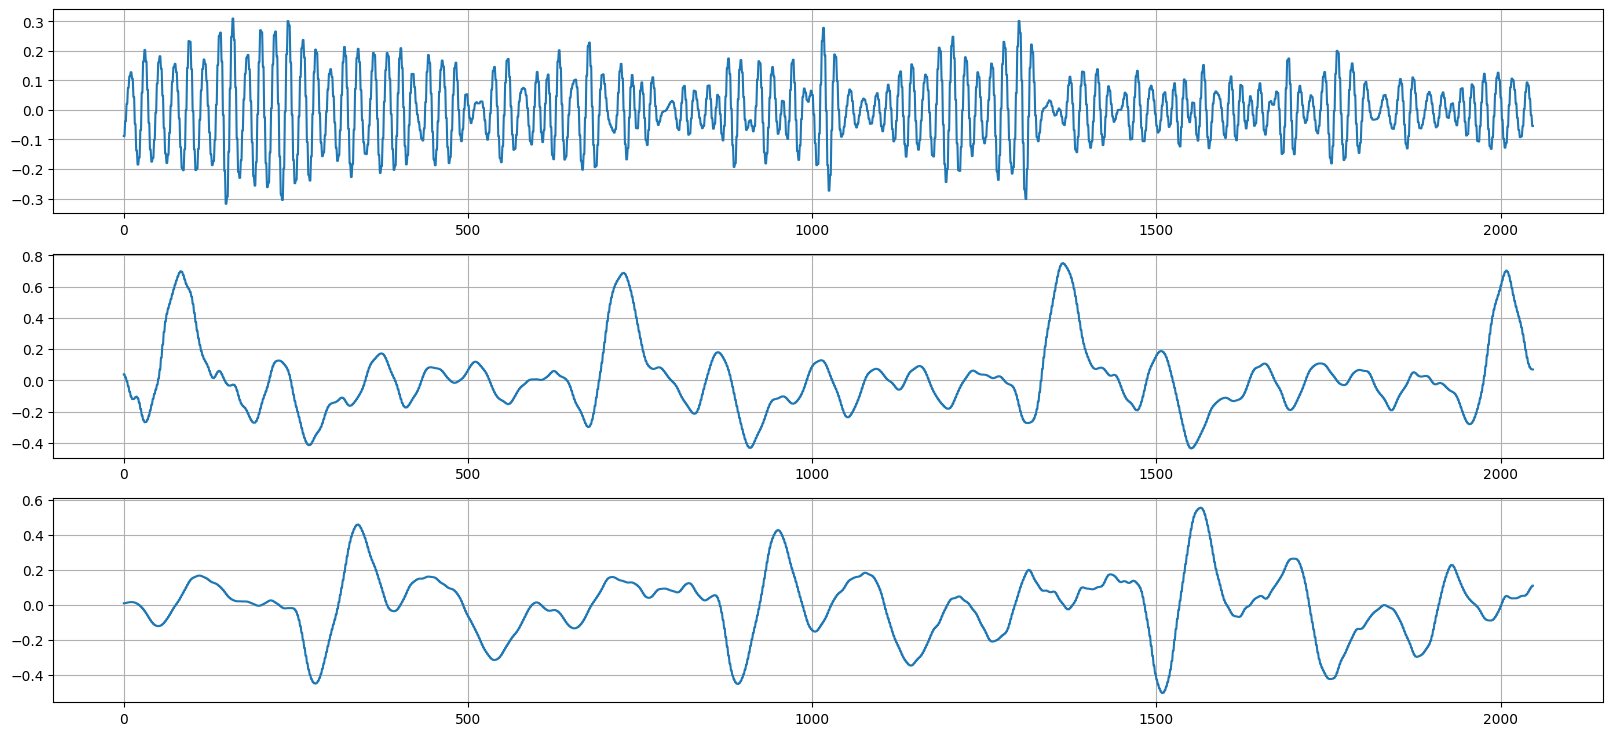

In [ ]:
data=[]
plt.figure(figsize=[20,9]) #the bigger the size --> the more resource needed
plt.subplot(3,1,1)
plt.plot(d1[100000:102048]) #remember this is from d1 index 90.000
data.append(d1[100000:102048]) #label se --> 001
plt.grid()
plt.subplot(3,1,2)
plt.plot(d1[128000:130048]) #130048-128000=2048 (y=2^n) --> 1,2,4,8,16,32,64,etc.
data.append(d1[128000:130048]) #label la --> 010
plt.grid()
plt.subplot(3,1,3)
plt.plot(d1[139500:141548]) #141548-139500=2048
data.append(d1[139500:141548]) #label mat --> 100
plt.grid()

In [ ]:
y=np.identity(3) #one hot encoding
y

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
data

[array([-0.0886178 , -0.0886178 , -0.0380798 , ..., -0.01766312,
        -0.05443329, -0.05443329]),
 array([0.03861708, 0.03861708, 0.02001372, ..., 0.07290233, 0.0697458 ,
        0.0697458 ]),
 array([0.0091002 , 0.0091002 , 0.01081278, ..., 0.10094169, 0.10987398,
        0.10987398])]

In [ ]:
x=dataa

In [ ]:
from keras.models import Sequential #start from top to bottom (from left to right)
from keras.layers import Dense #dense the simplest deep learning modelmodel = Sequential() #model deep learning = artificial neural network (ANN)


In [ ]:
model.add(Dense(len(x[0]), activation='relu', input_shape=x[0].shape)) #input
model.add(Dense(len(x[0]), activation='relu')) #hidden 1
model.add(Dense(len(y[0,:]), activation='softmax',)) #sigmoid, tanh, step, adam, SGD, # output
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #Adaptive Moment Estimation
#RMSprop, adam, Adadelta, SGD,

NameError: name 'model' is not defined

In [ ]:
log = model.fit(x, y, validation_data=(x,y), epochs=6, batch_size=3) #1 probability as feedback

In [ ]:
len(data[0])

2048

In [ ]:
import numpy as np
dataa=np.array(data)

In [ ]:
np.savetxt("selamat.csv", dataa, delimiter=",")

In [ ]:
a = pydub.AudioSegment.from_file('/content/spi.m4a')
#b = pydub.AudioSegment.from_file('/content/spi.m4a')

In [ ]:
b = pydub.AudioSegment.from_file('/content/tes2.mpeg')

In [ ]:
print(a.frame_rate)

48000


In [ ]:
import numpy as np #deal with numeric values in matrix

In [ ]:
ad = np.array(a.get_array_of_samples())
#bd = np.array(a.get_array_of_samples())

In [ ]:
bd = np.array(b.get_array_of_samples())

In [ ]:
import matplotlib.pyplot as plt #graph library
import librosa

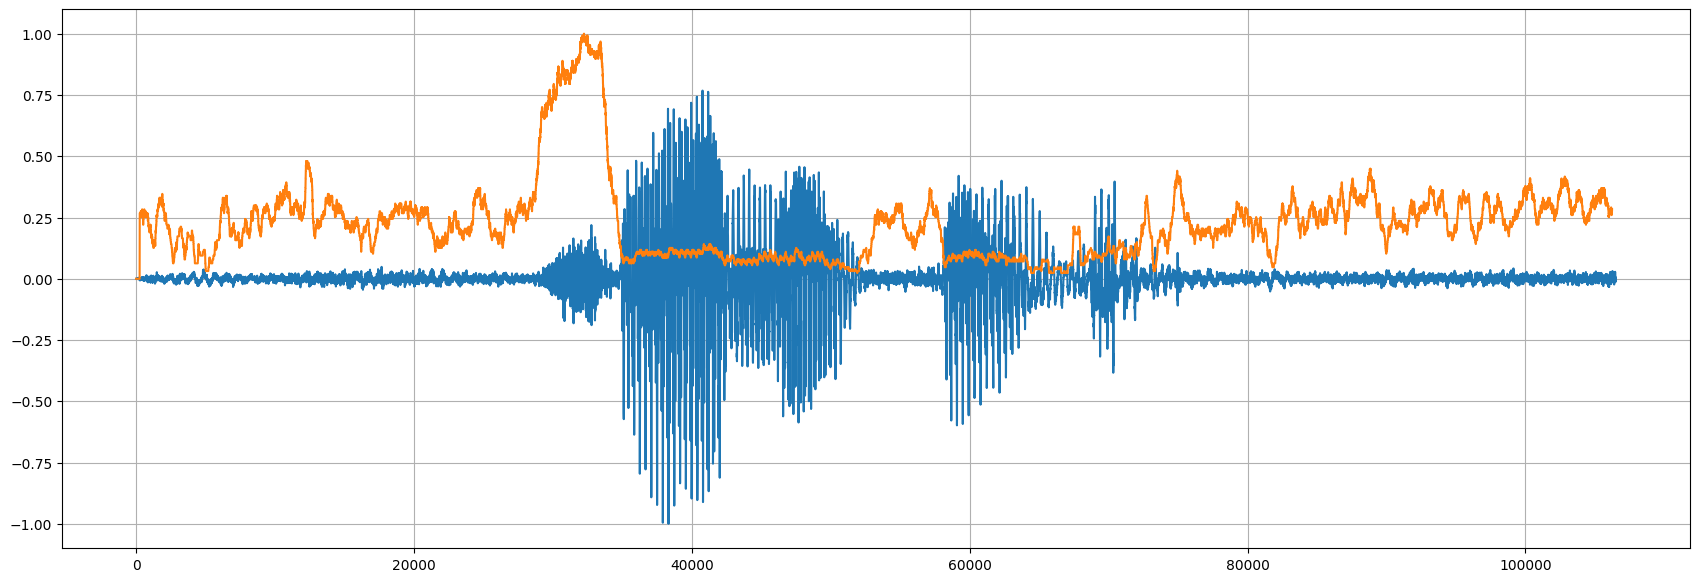

In [ ]:
plt.figure(figsize=[21,7])
plt.plot(ad/abs(np.min(ad)))
plt.grid()
r=[]
for i in range(256):
      r.append(0)
for i in range(len(ad)-512):
    r.append(np.shape(np.array(np.asarray(librosa.zero_crossings(ad[i:i+512])==True).nonzero()))[1])
r=r/(np.max(r))
plt.plot(r)

In [ ]:
plt.figure(figsize=[21,7])
plt.plot(bd/abs(np.max(bd)))
plt.grid()
r=[]
for i in range(256):
      r.append(0)
for i in range(len(bd)-512):
    r.append(np.shape(np.array(np.asarray(librosa.zero_crossings(bd[i:i+512])==True).nonzero()))[1])
r=r/(np.max(r))
plt.plot(r)

In [ ]:
plt.figure(figsize=[20,6])
plt.plot(ad[19500:20500])
plt.grid()
plt.plot(ad[39500:40500])

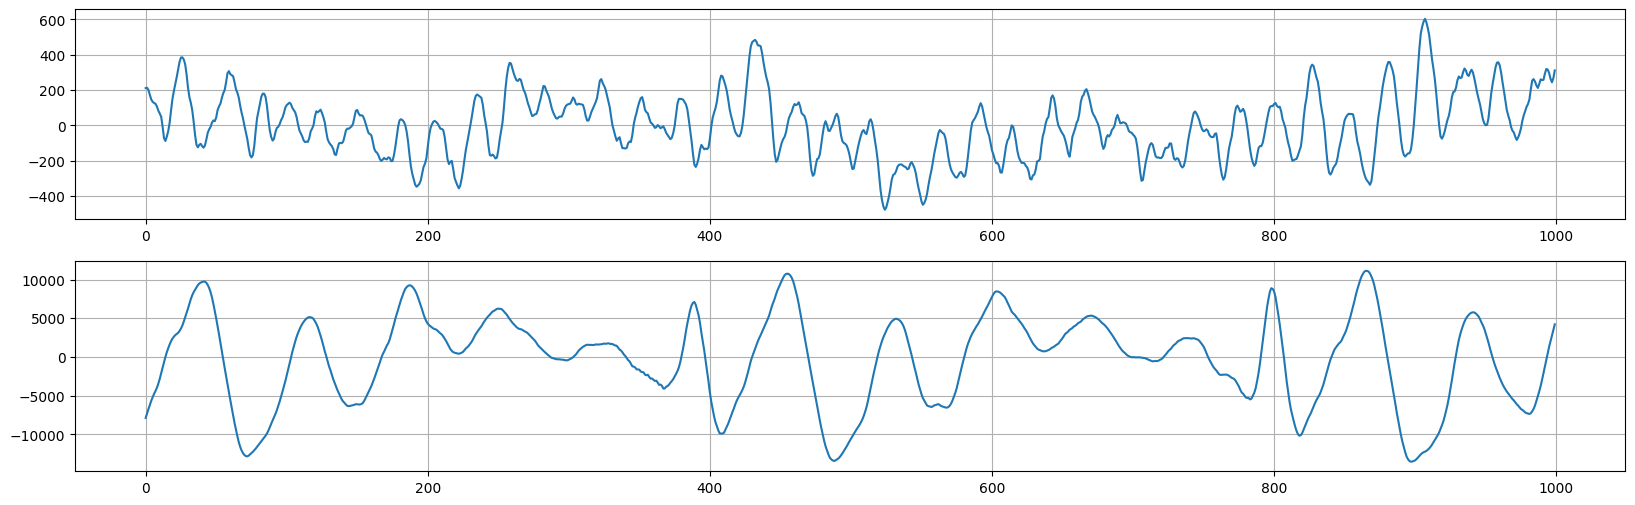

In [ ]:
plt.figure(figsize=[20,6])
plt.subplot(2,1,1)
plt.plot(ad[19500:20500])
plt.grid()
plt.subplot(2,1,2)
plt.plot(ad[39500:40500])
plt.grid()

In [ ]:
import scipy

In [ ]:
d, c = scipy.signal.butter(3, 0.02, 'low') #butterworth >> remove/erase all frquency bigger than 2 Hz
b = scipy.signal.filtfilt(d, c, ad) #forward/backward

In [ ]:
from scipy.io.wavfile import write

In [ ]:
write('spi002.wav', 48000, b/np.max(b))

In [ ]:
from pydub.playback import play


In [ ]:
play(a)

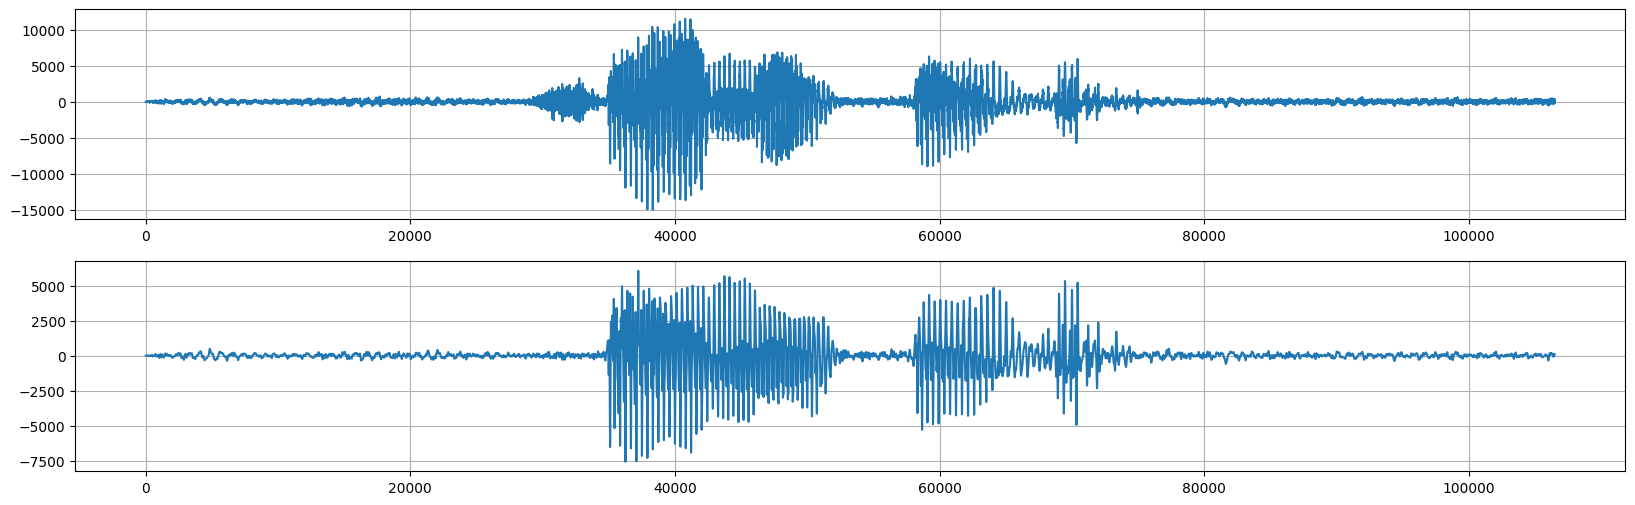

In [ ]:
plt.figure(figsize=[20,6])
plt.subplot(2,1,1)
plt.plot(ad)
plt.grid()
plt.subplot(2,1,2)
plt.plot(b)
plt.grid()

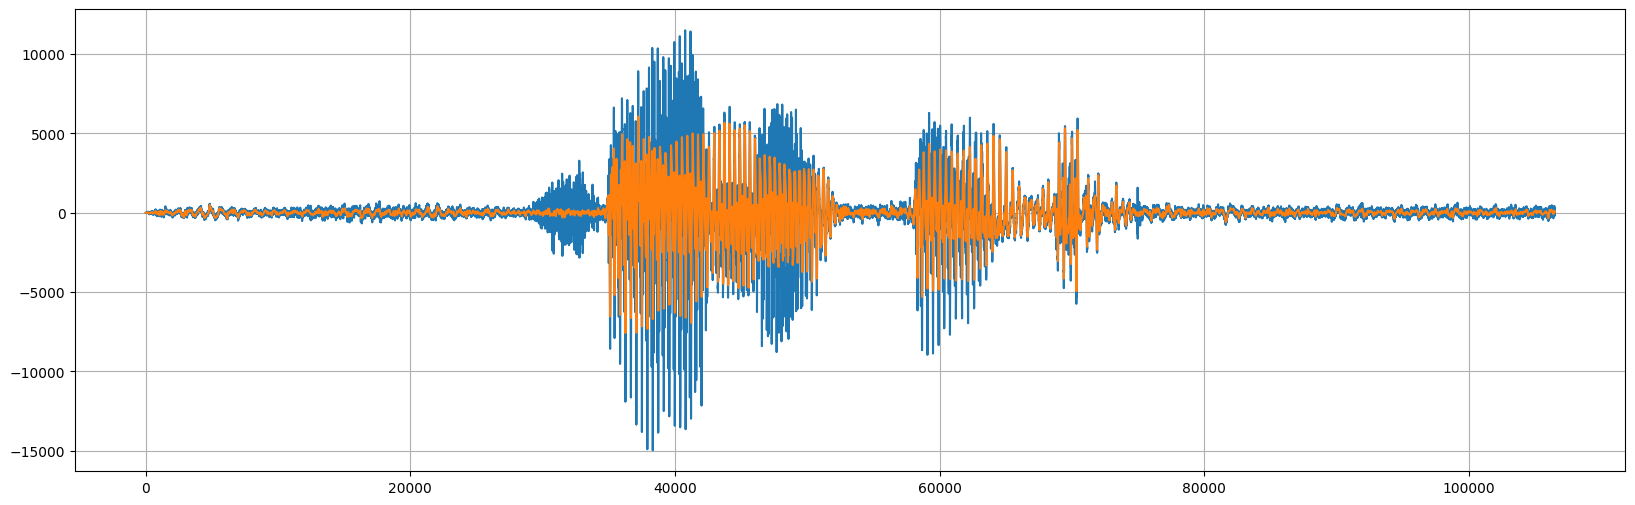

In [ ]:
plt.figure(figsize=[20,6])
plt.plot(ad)
plt.grid()
plt.plot(b)


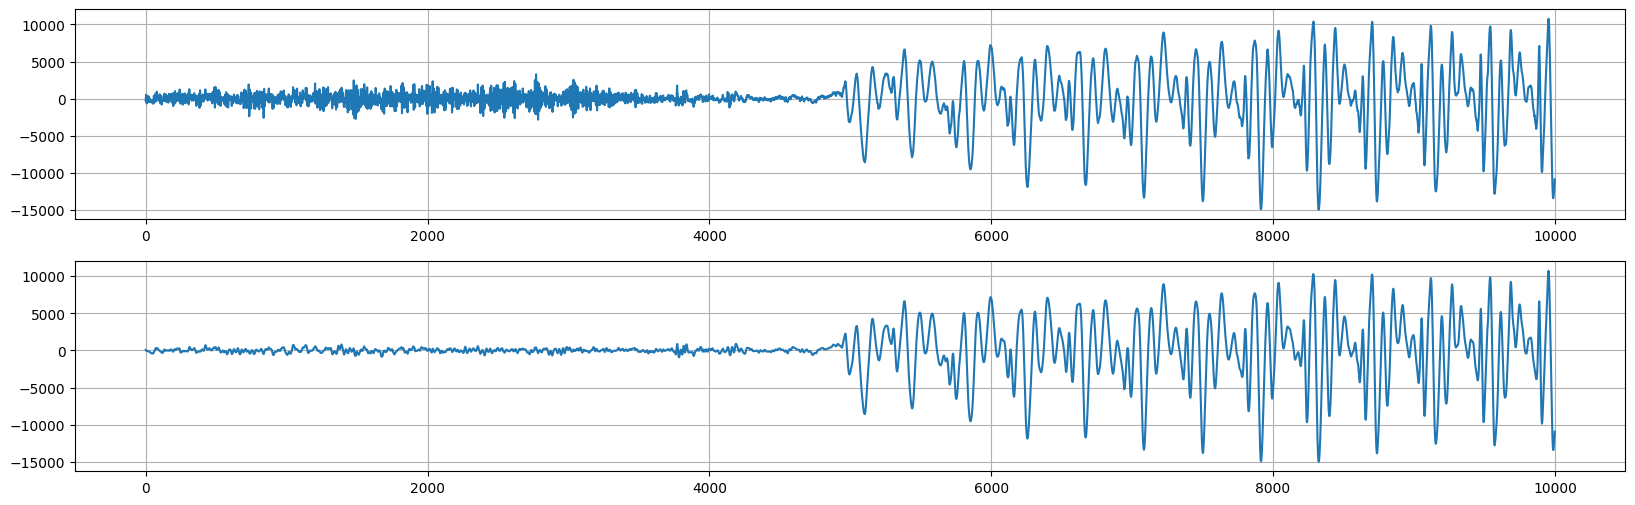

In [ ]:
plt.figure(figsize=[20,6])
plt.subplot(2,1,1)
plt.plot(ad[30000:40000])
plt.grid()
plt.subplot(2,1,2)
plt.plot(b[30000:40000])
plt.grid()

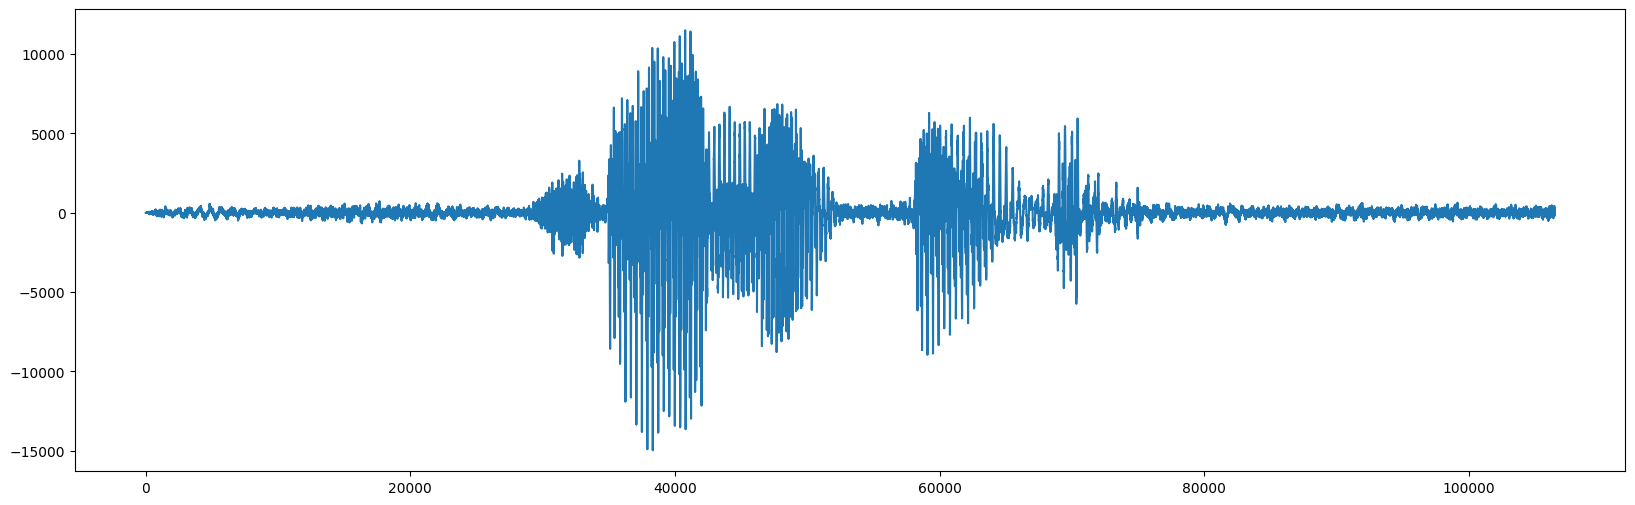

In [ ]:
plt.figure(figsize=[20,6])
plt.plot(bd)
#plt.plot(ad[58000:59024]) #pa1
#plt.plot(ad[60000:61024]) #pa2
#x.append(ad[60000:61024]) #pa middle
#x.append(ad[64500:65524]) #pa ending

In [ ]:
np.abs(ad[15000])

339

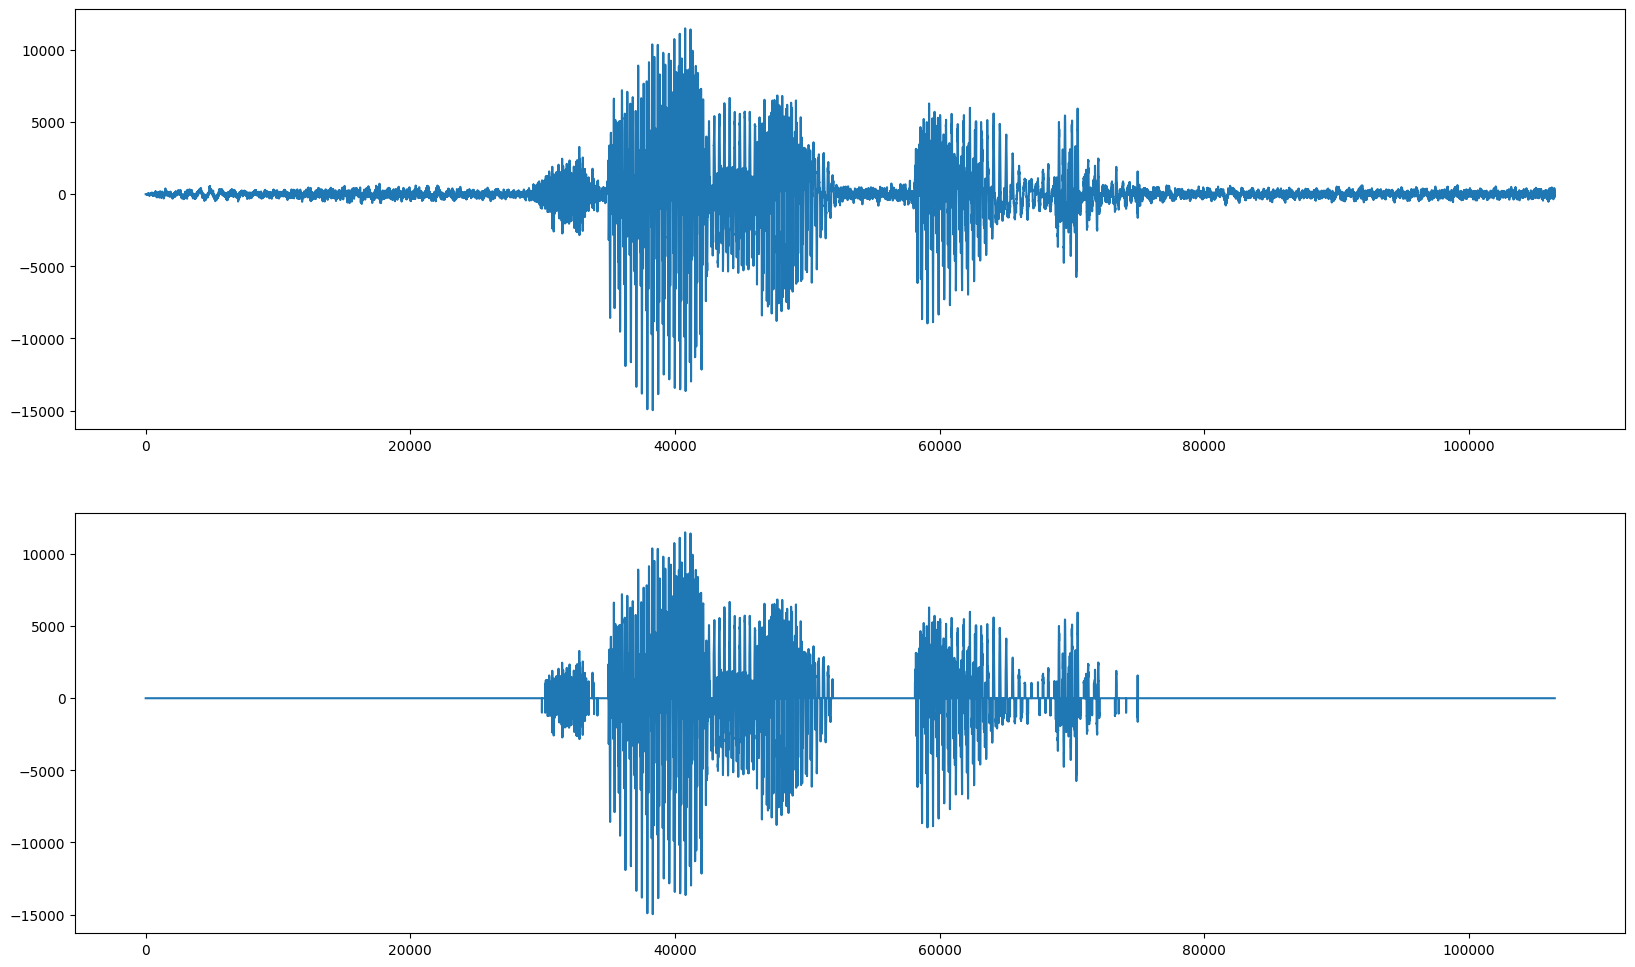

In [ ]:
for i in range(0,len(ad)):
  if np.abs(ad[i])<1000: #th=1000
    ad[i]=0 #ad[i]
plt.figure(figsize=[20,12])
plt.subplot(2,1,1)
plt.plot(bd)
plt.subplot(2,1,2)
plt.plot(ad)

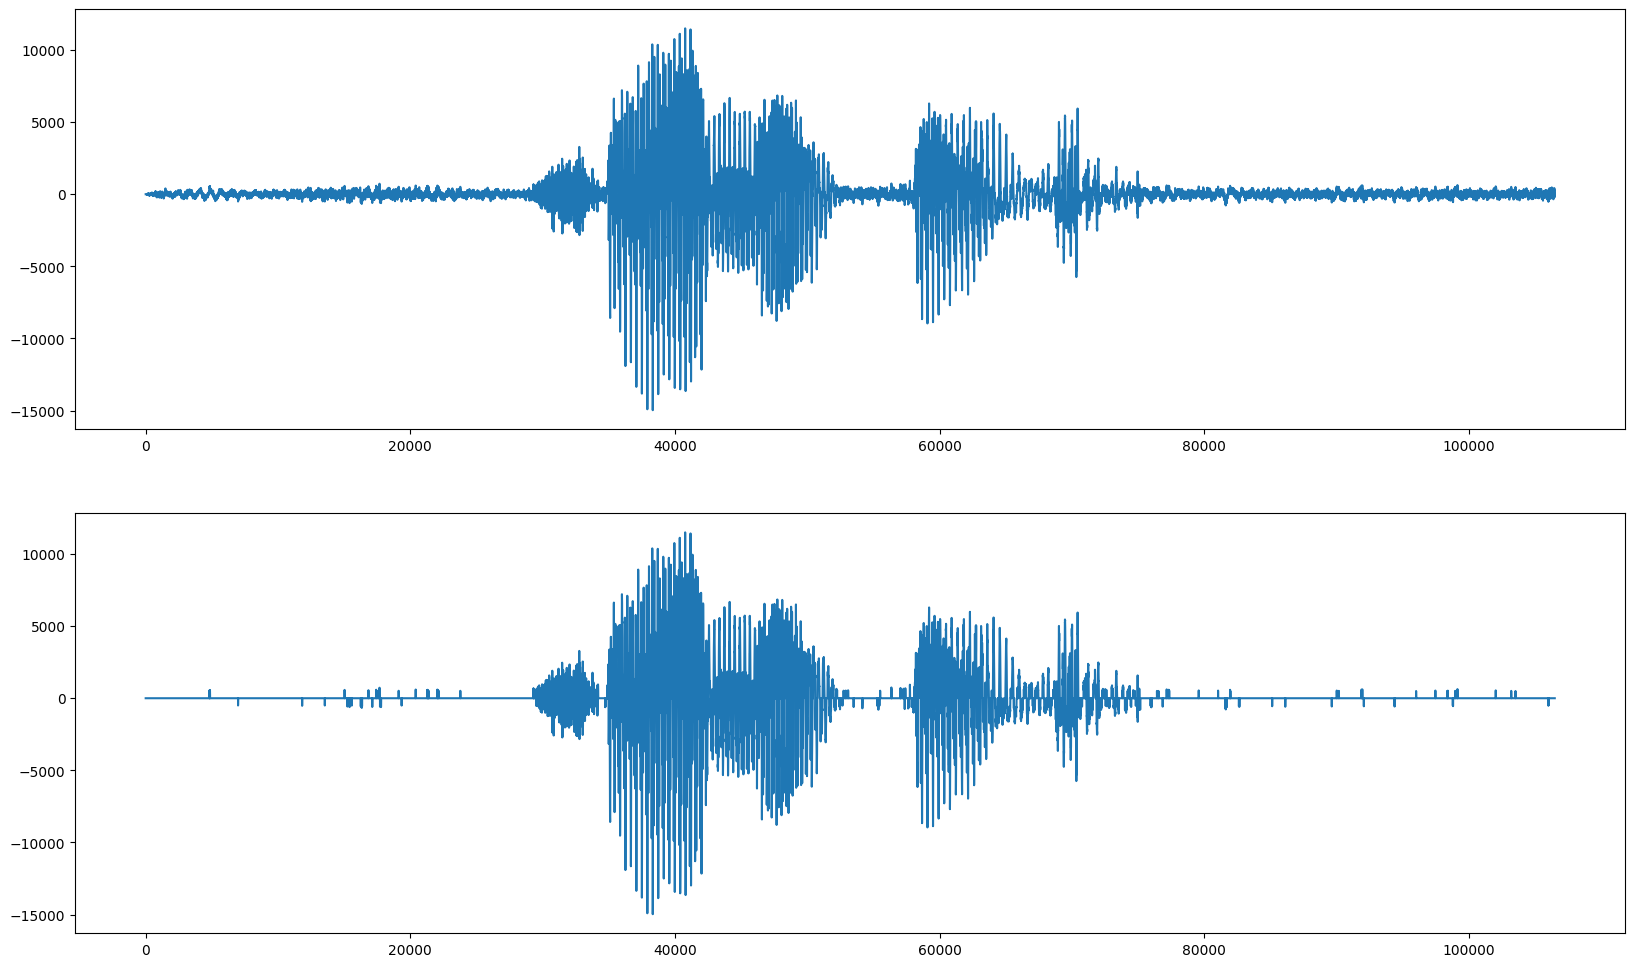

In [ ]:
ad = np.array(a.get_array_of_samples())
for i in range(0,len(ad)):
  if np.abs(ad[i])<500: #th=1000
    ad[i]=0 #ad[i]
plt.figure(figsize=[20,12])
plt.subplot(2,1,1)
plt.plot(bd)
plt.subplot(2,1,2)
plt.plot(ad)

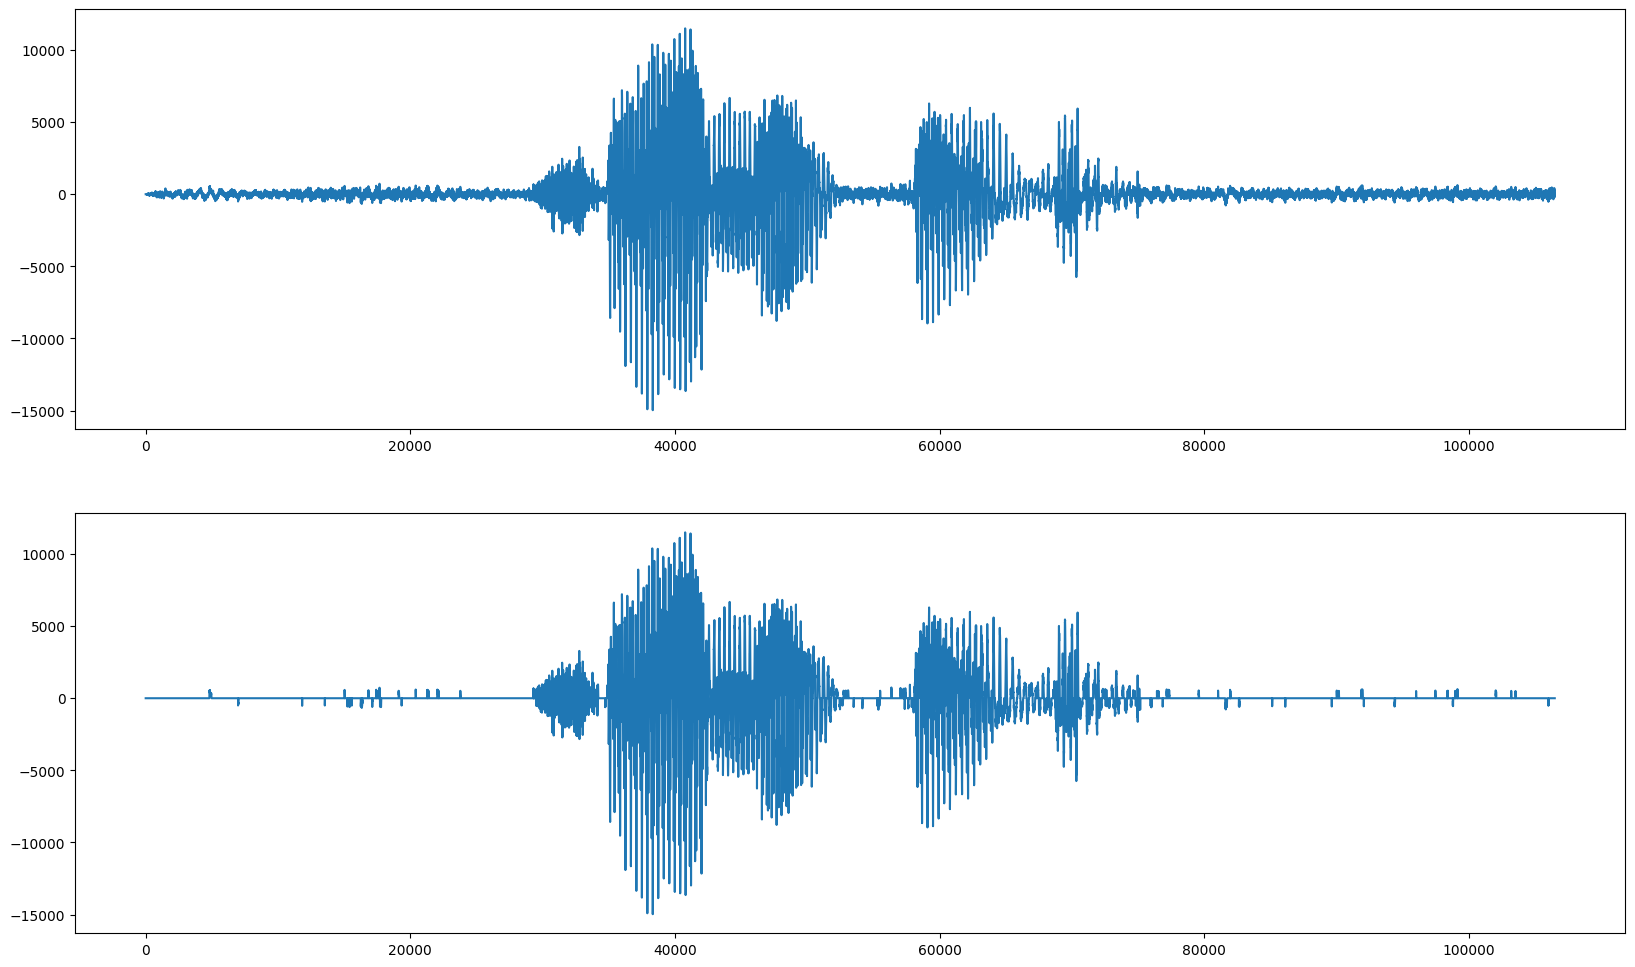

In [ ]:
ad = np.array(a.get_array_of_samples())
for i in range(0,len(ad)):
  if np.abs(np.sum(ad[i:i+3]))<500: #th=1000
    ad[i:i+3]=0 #ad[i]
plt.figure(figsize=[20,12])
plt.subplot(2,1,1)
plt.plot(bd)
plt.subplot(2,1,2)
plt.plot(ad)

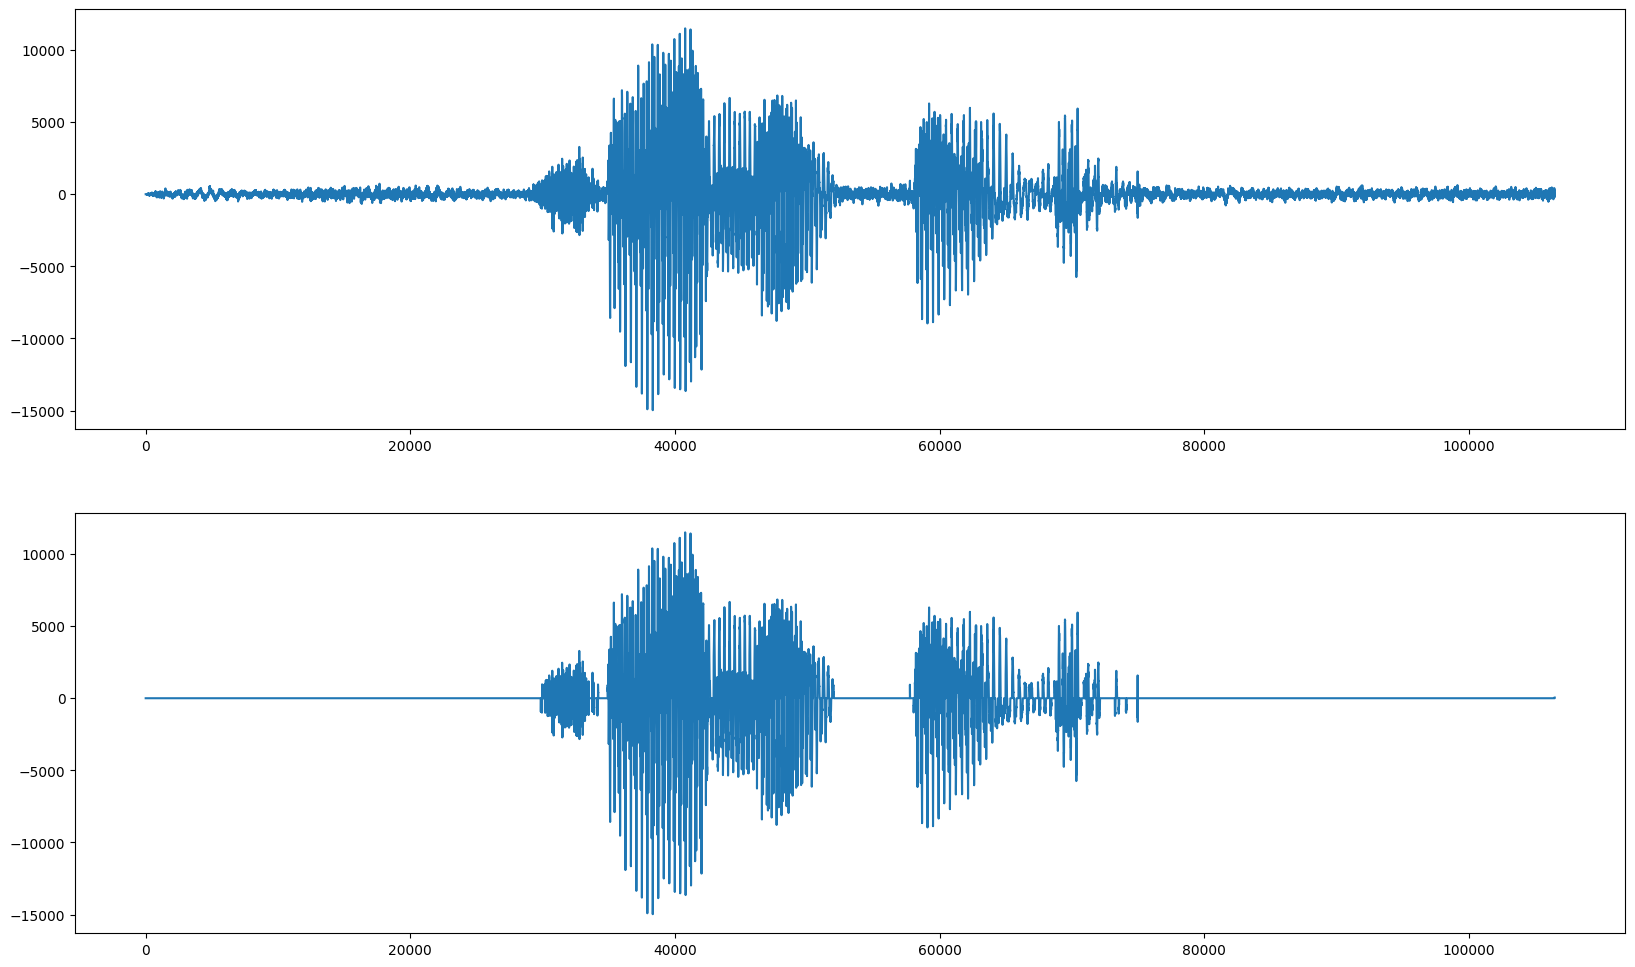

In [ ]:
ad = np.array(a.get_array_of_samples())
for i in range(3,len(ad)):
  if np.abs(np.sum(ad[i-3:i]))<900: #th=1000
    ad[i-3:i]=0 #ad[i]
plt.figure(figsize=[20,12])
plt.subplot(2,1,1)
plt.plot(bd)
plt.subplot(2,1,2)
plt.plot(ad)

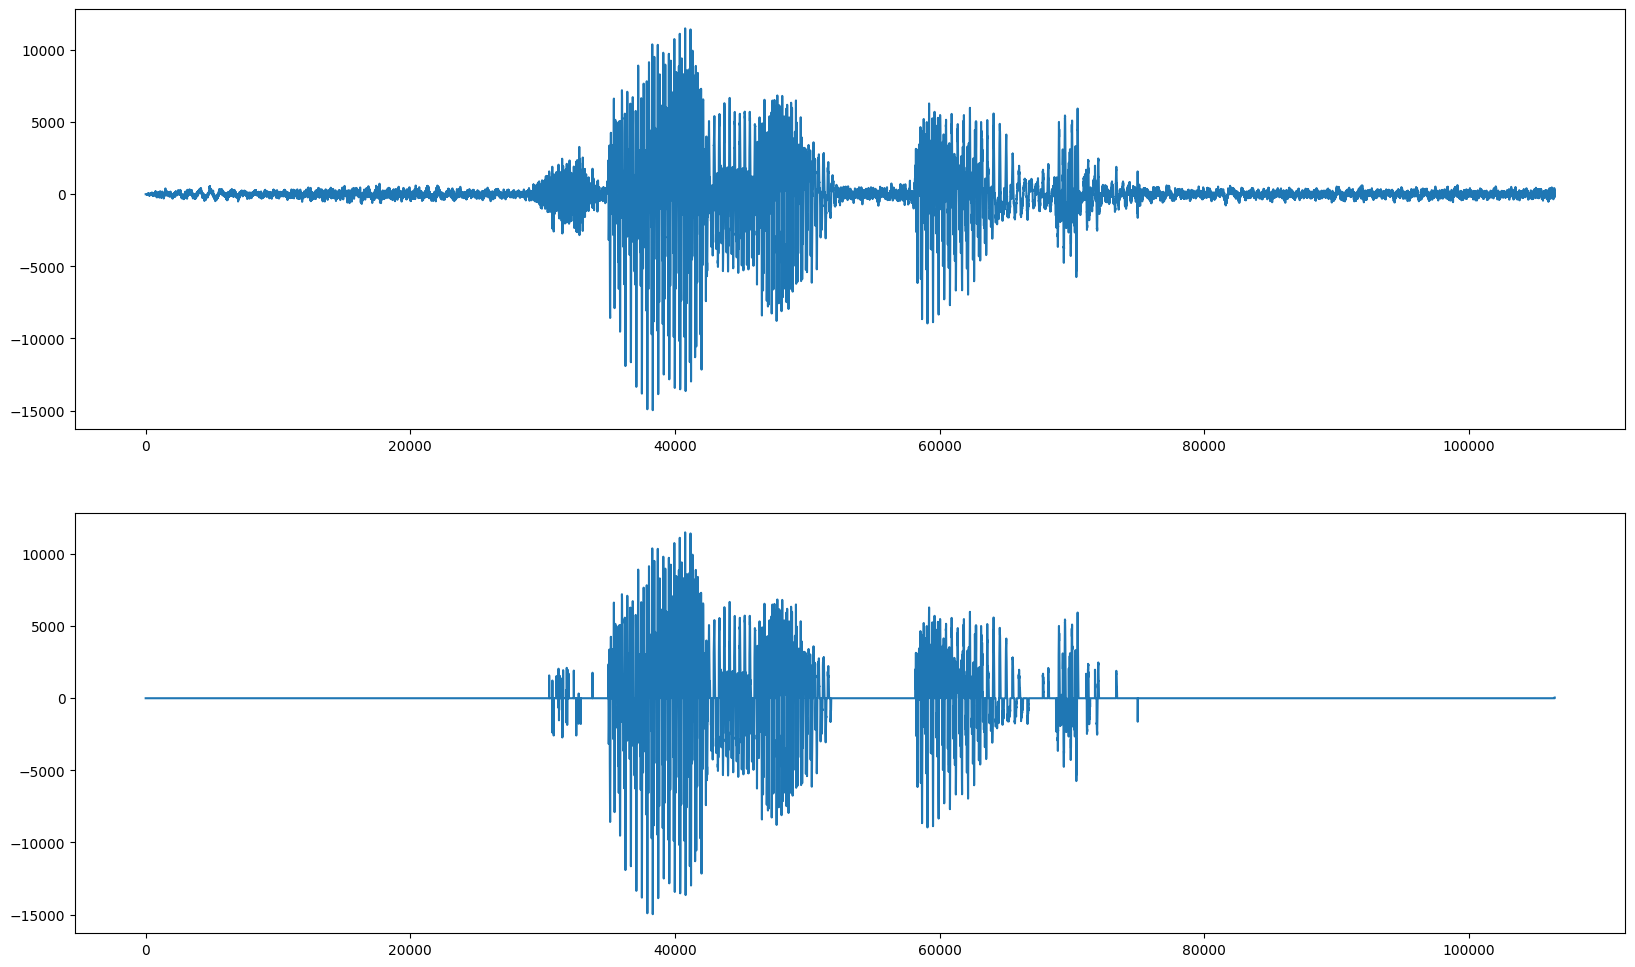

In [ ]:
ad = np.array(a.get_array_of_samples())
for i in range(9,len(ad)):
  if np.abs(np.sum(ad[i-9:i]))<1500: #th=1000
    ad[i-9:i]=0 #ad[i]
plt.figure(figsize=[20,12])
plt.subplot(2,1,1)
plt.plot(bd)
plt.subplot(2,1,2)
plt.plot(ad)

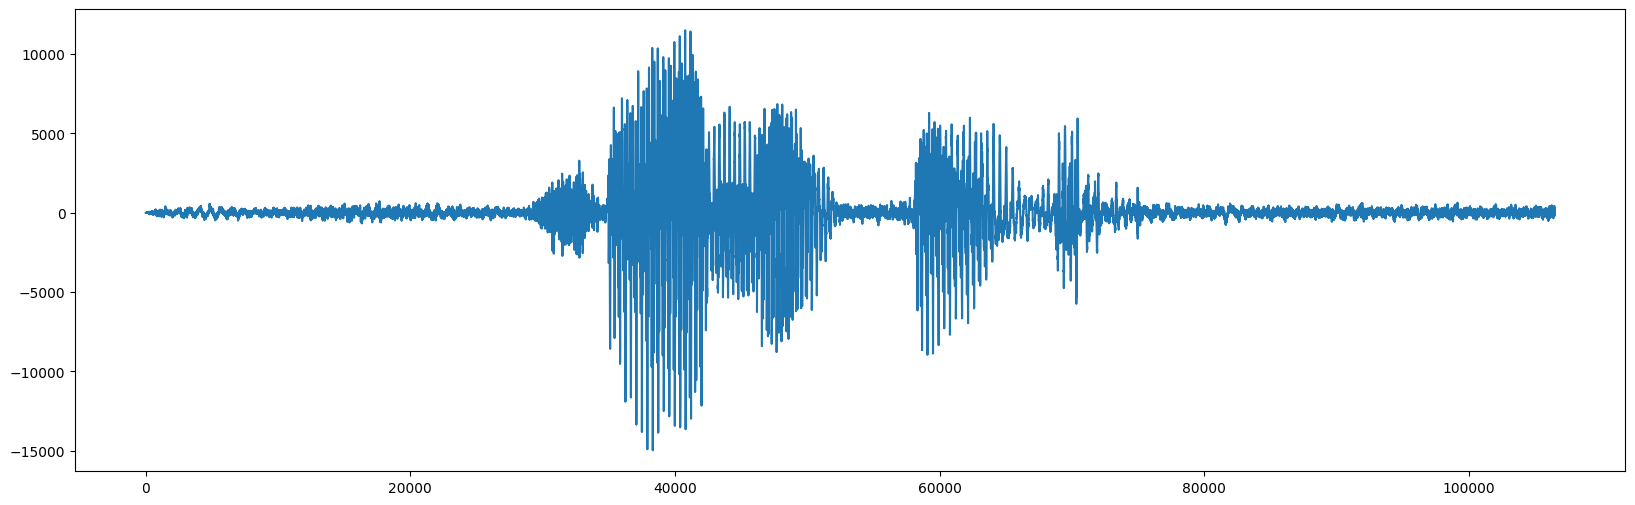

In [ ]:
plt.figure(figsize=[20,6])
plt.plot(ad)

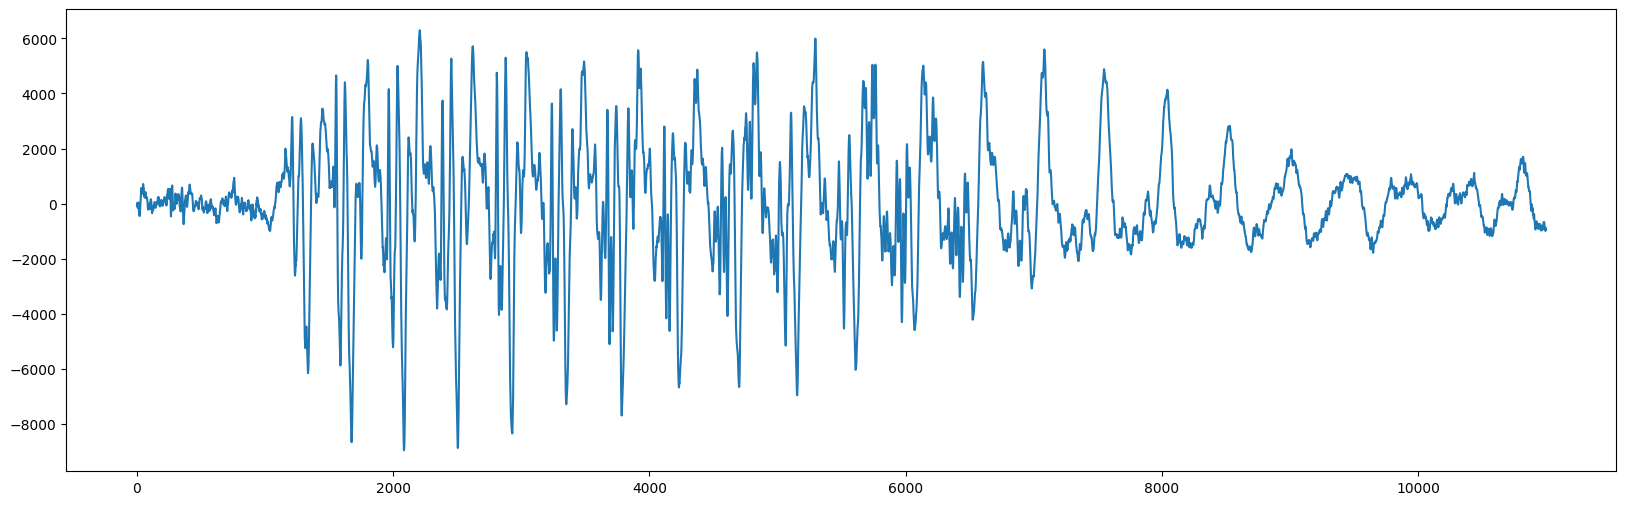

In [ ]:
plt.figure(figsize=[20,6])
plt.plot(ad[57000:68000])

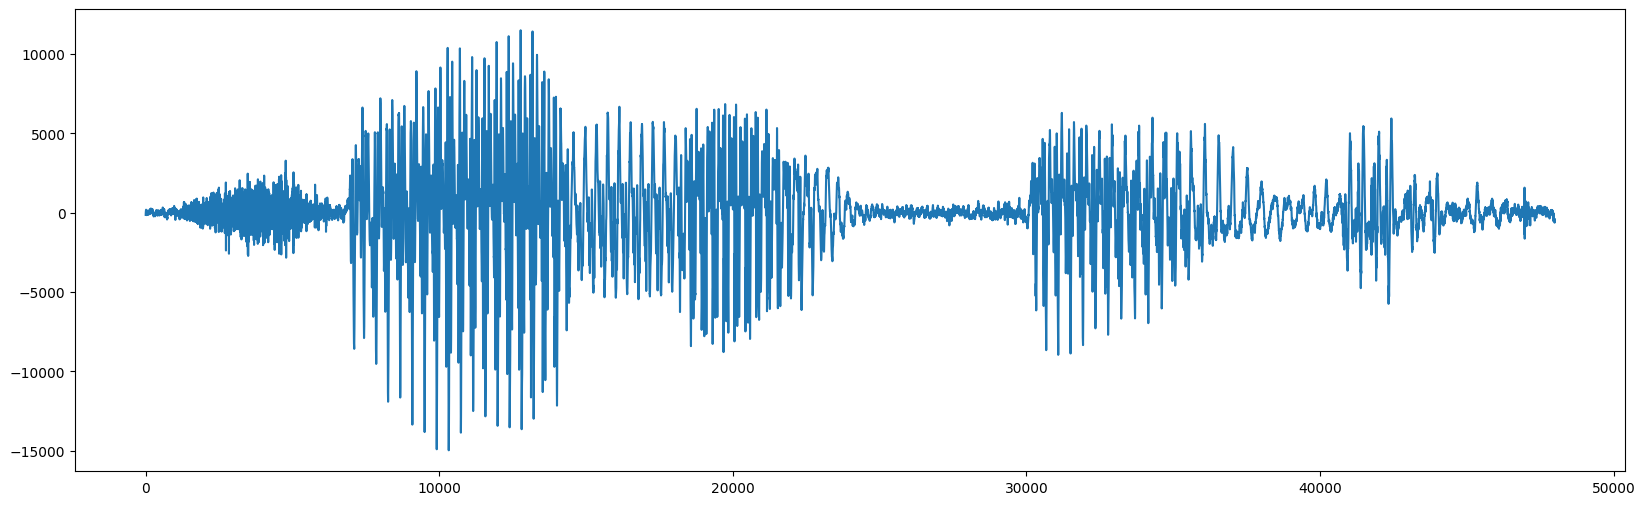

In [ ]:
plt.figure(figsize=[20,6])
plt.plot(ad[28000:76000])
#labelling: map phoneme/syllable

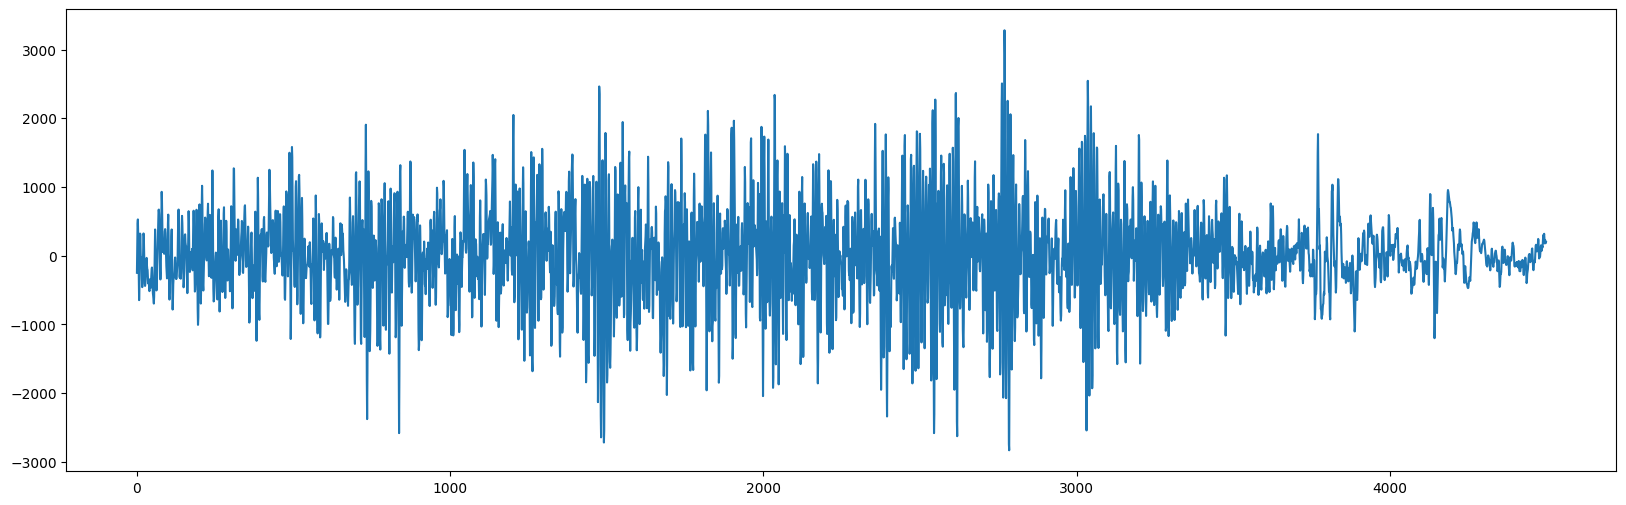

In [ ]:
plt.figure(figsize=[20,6])
plt.plot(ad[30000:34500]) #se --> se beginning(111), se middle(010), se end (001)
#selamat pagi --> 15 label (000 000 000 000 001)

In [ ]:
se = ad[30000:34500]
se1 = se[0:1024] #se beginning 2^n 1024 (2^10) 2048 and 4096
se2 = se[1200:2224] #se middle
se3 = se[3000:4024] #se ending
pa1 = ad[58000:59024] #pa beginning
pa2 = ad[60000:61024] #pa middle
pa3 = ad[64500:65524] #pa ending

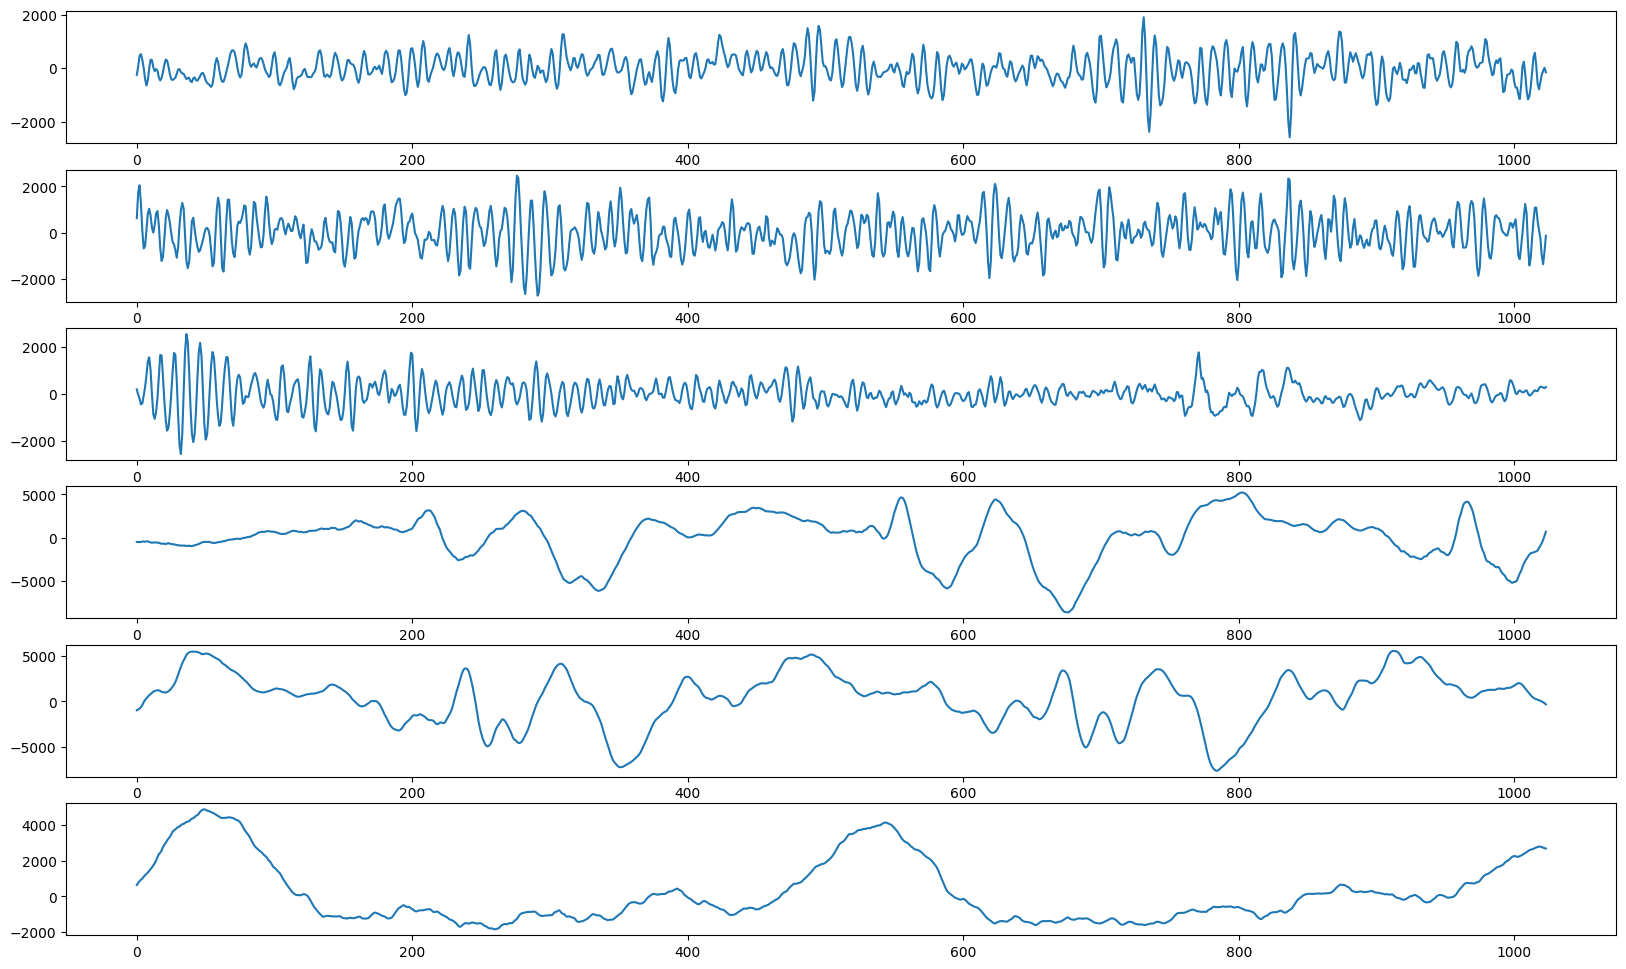

In [ ]:
plt.figure(figsize=[20,12])
plt.subplot(6,1,1)
plt.plot(se[0:1024]) #se1
plt.subplot(6,1,2)
plt.plot(se[1200:2224]) #se2
plt.subplot(6,1,3)
plt.plot(se[3000:4024]) #se3
plt.subplot(6,1,4)
plt.plot(ad[58000:59024]) #pa1
plt.subplot(6,1,5)
plt.plot(ad[60000:61024]) #pa2
plt.subplot(6,1,6)
plt.plot(ad[64500:65524]) #pa3

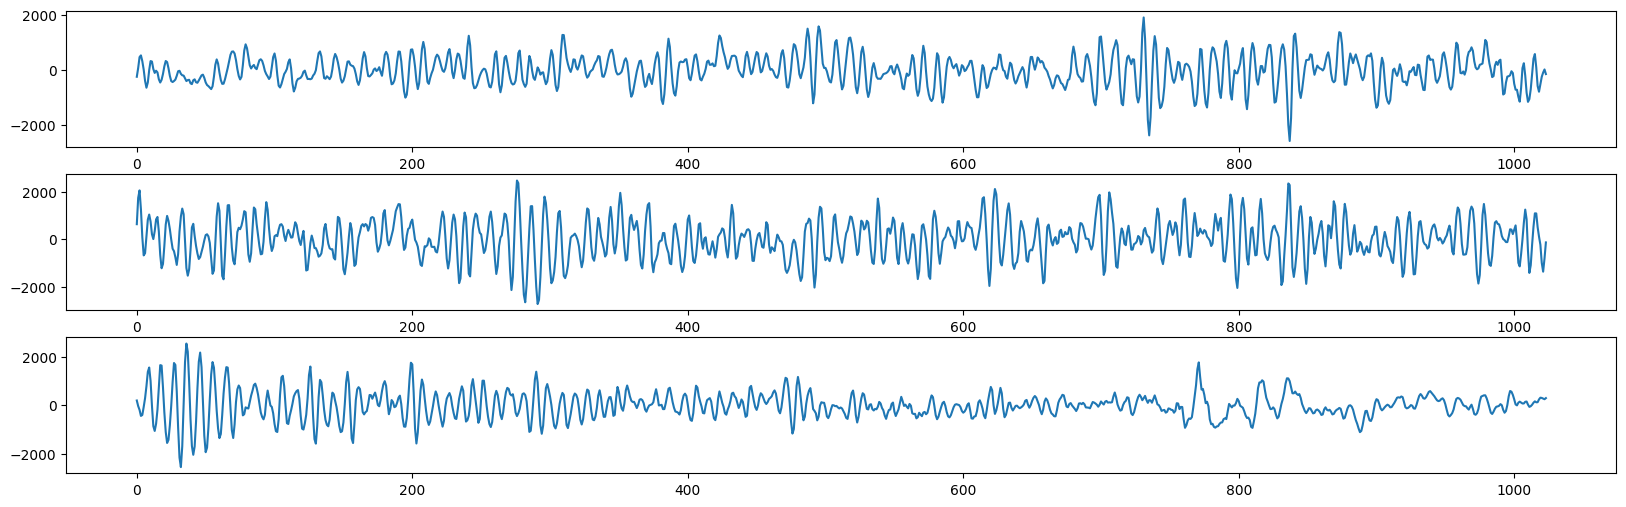

In [ ]:
plt.figure(figsize=[20,6])
plt.subplot(3,1,1)
plt.plot(se[0:1024]) #se1
plt.subplot(3,1,2)
plt.plot(se[1200:2224]) #se2
plt.subplot(3,1,3)
plt.plot(se[3000:4024]) #se3

In [ ]:
print(se[0:1024],se[1200:2224],se[3000:4024], sep=os.linesep) #sep=os.linesep

[-250   69  465 ...  -97   16 -151]
[  630  1733  2048 ... -1362  -809  -135]
[ 199  -31 -188 ...  276  252  298]


In [ ]:
print(se[0:14],se[1200:1214],se[3000:3014], sep=os.linesep)

[-250   69  465  527  318   10 -398 -648 -457   -7  321  303   31 -110]
[ 630 1733 2048 1257   88 -679 -588  145  820 1035  743  211    5  339]
[  199   -31  -188  -435  -399   -68   293   788  1380  1559  1007   -14
  -857 -1055]


In [ ]:
import os

In [ ]:
#data se1, se2, se3
y=array([[0, 0, 1], #0,0,0,0,0,1
       [0, 1, 0],
       [1, 0, 0]]) #one hot encoding

In [ ]:
x=[]
x.append(se1) #data lenght = 1024 data
x.append(se2)
x.append(se3)
x.append(ad[58000:59024]) #pa beginning
x.append(ad[60000:61024]) #pa middle
x.append(ad[64500:65524]) #pa ending
y=[]
y.append([0,0,0,0,0,1]) #one hot encoding (labelling process)
y.append([0,0,0,0,1,0])
y.append([0,0,0,1,0,0])
y.append([0,0,1,0,0,0])
y.append([0,1,0,0,0,0])
y.append([1,0,0,0,0,0])
x=np.array(x)
y=np.array(y)

#se1 = [0,0,0,0,0,1]
#la1 = [0,0,1.0,0,0]
#la2 = [0,1,0]
#la3 = [1,0,0]

#se1 = 1
#se2 = 2

#la1 = 4

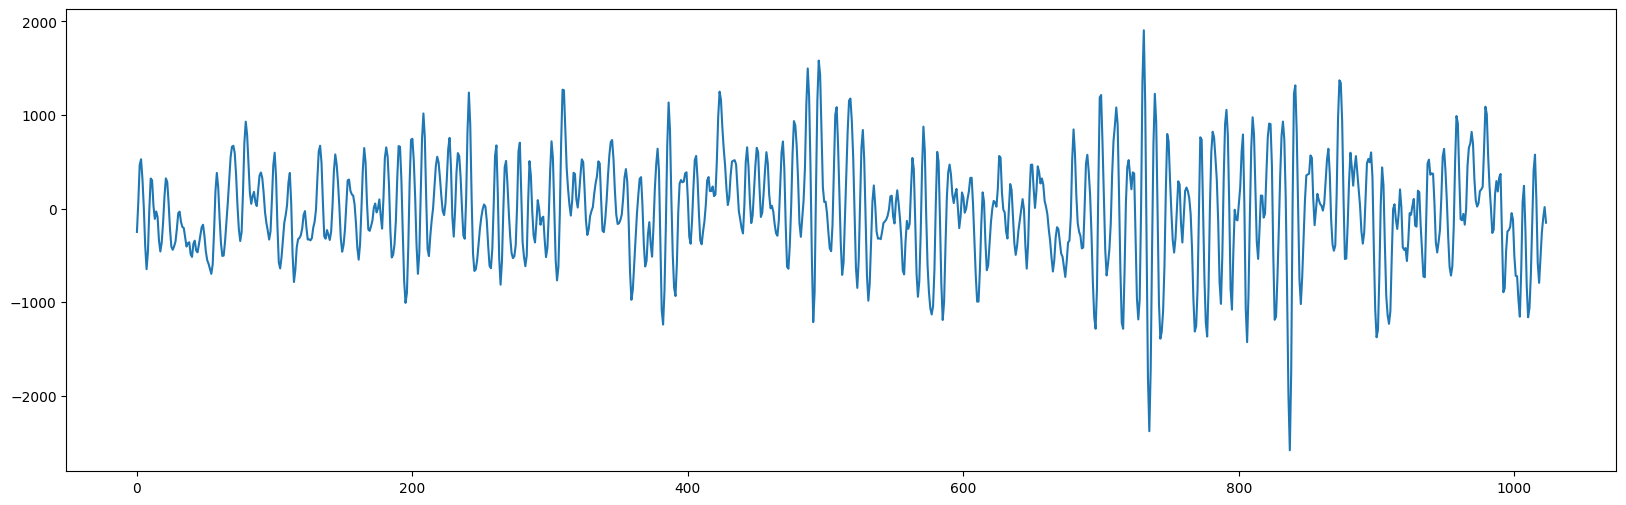

In [ ]:
plt.figure(figsize=[20,6])
plt.plot(se[0:1024]) #se1

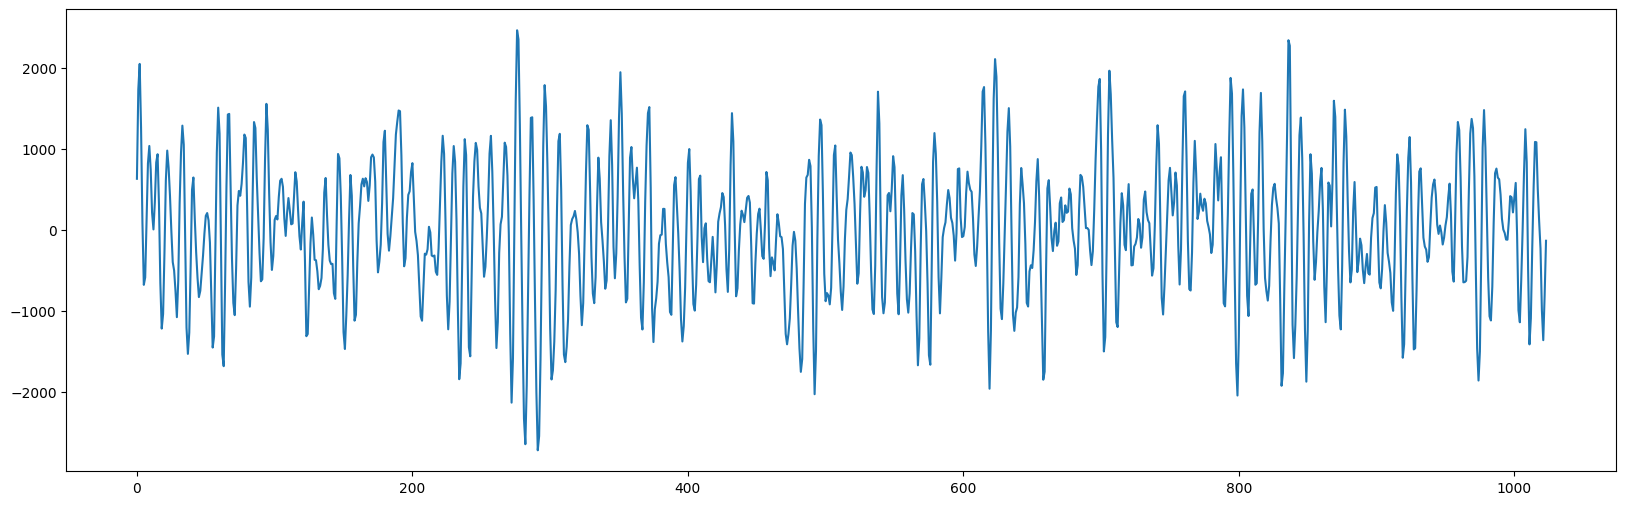

In [ ]:
plt.figure(figsize=[20,6])
plt.plot(se[1200:2224]) #se1

In [ ]:
ad[40000:40010]

array([-10578, -10253,  -9940,  -9637,  -9340,  -9076,  -8795,  -8467,
        -8105,  -7652], dtype=int16)

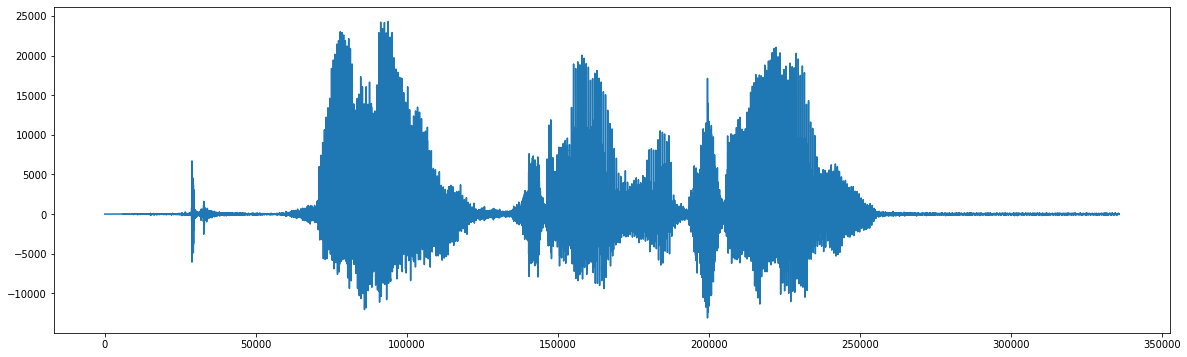

In [ ]:
import matplotlib.pyplot as plt #graph library
plt.figure(figsize=[20,6]) #phoneme voiced vs. unvoiced, 39 phoneme (44) 26 alphabet #syllable
plt.plot(y) #4x 'i', 1x 'n', 2x 'b', 1x 'd', 2x 'u' total 10 phonemes, 5 types >> labelling (dataset)

In [ ]:
x=[] #list
x.append(ad[0:16]) #data lenght = 16 data
x.append(ad[16:32])
x.append(ad[32:48])
y=[]
y.append([0,0,1]) #one hot encoding (labelling process)
y.append([0,1,0])
y.append([1,0,0])
x=np.array(x)
y=np.array(y)

In [ ]:
x

array([array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2], dtype=int16),
       array([3, 3, 3, 3, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2], dtype=int16),
       array([ 2,  2,  1,  1,  0,  0, -1, -1, -2, -2, -3, -4, -5, -6, -7],
             dtype=int16)                                                 ],
      dtype=object)

In [ ]:
y

array([[0, 0, 1],
       [0, 1, 0],
       [1, 0, 0]])

In [ ]:
from keras.models import Sequential #start from top to bottom (from left to right)
from keras.layers import Dense #dense the simplest deep learning model

In [ ]:
len(x[0])

16

In [ ]:
x[0].shape

(16,)

In [ ]:
from keras.models import Sequential #start from top to bottom (from left to right)
from keras.layers import Dense #dense the simplest deep learning modelmodel = Sequential() #model deep learning = artificial neural network (ANN)
model.add(Dense(len(x[0]), activation='relu', input_shape=x[0].shape)) #input
#model.add(Dense(16, activation='relu', input_shape=(16,)))) #input
model.add(Dense(len(x[0]), activation='relu')) #hidden 1
model.add(Dense(len(y[0,:]), activation='softmax',)) #sigmoid, tanh, step, adam, SGD, # output
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #Adaptive Moment Estimation
#RMSprop, adam, Adadelta, SGD,
log = model.fit(x, y, validation_data=(x,y), epochs=6, batch_size=3) #1 probability as feedback

In [ ]:
change = 8, error 26
change = 12, error 19
change = 14 error 9
change = 11 error 3
change = 3 error 1
change = 0.5 so on

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #Adaptive Moment Estimation
#RMSprop, adam, Adadelta, SGD,
log = model.fit(x, y, validation_data=(x,y), epochs=6, batch_size=3) #1 probability as feedback

Epoch 1/6
2/2 [==============================] - 1s 272ms/step - loss: 2388.9607 - accuracy: 0.1667 - val_loss: 4286.6948 - val_accuracy: 0.8333
Epoch 2/6
2/2 [==============================] - 0s 56ms/step - loss: 5663.8574 - accuracy: 0.8333 - val_loss: 2710.3325 - val_accuracy: 0.8333
Epoch 3/6
2/2 [==============================] - 0s 57ms/step - loss: 2710.3325 - accuracy: 0.8333 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/6
2/2 [==============================] - 0s 54ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/6
2/2 [==============================] - 0s 70ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/6
2/2 [==============================] - 0s 61ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


In [ ]:
p=model.predict(x)
scores = model.evaluate(x,y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
#row = "| {no:<4d} [ {p1:.2f} {p2:.2f} {p3:.2f}] [ {r1:.2f} {r2:.2f} {r3:.2f}]".format
row = "| {no:<4d} [ {p1:.2f} {p2:.2f} {p3:.2f} {p4:.2f} {p5:.2f} {p6:.2f}] [ {r1:.2f} {r2:.2f} {r3:.2f} {r4:.2f} {r5:.2f} {r6:.2f}]".format
for i in range(len(x)):
    #print(row(no=i, p1=p[i,0], p2=p[i,1], p3=p[i,2], r1=y[i,0], r2=y[i,1], r3=y[i,2]))
    print(row(no=i, p1=p[i,0], p2=p[i,1], p3=p[i,2], p4=p[i,3], p5=p[i,4], p6=p[i,5], r1=y[i,0], r2=y[i,1], r3=y[i,2], r4=y[i,3], r5=y[i,4], r6=y[i,5]))

1/1 [==============================] - 0s 198ms/step - loss: 0.0000e+00 - accuracy: 1.0000
accuracy: 100.00%
| 0    [ 0.00 0.00 0.00 0.00 0.00 1.00] [ 0.00 0.00 0.00 0.00 0.00 1.00]
| 1    [ 0.00 0.00 0.00 0.00 1.00 0.00] [ 0.00 0.00 0.00 0.00 1.00 0.00]
| 2    [ 0.00 0.00 0.00 1.00 0.00 0.00] [ 0.00 0.00 0.00 1.00 0.00 0.00]
| 3    [ 0.00 0.00 1.00 0.00 0.00 0.00] [ 0.00 0.00 1.00 0.00 0.00 0.00]
| 4    [ 0.00 1.00 0.00 0.00 0.00 0.00] [ 0.00 1.00 0.00 0.00 0.00 0.00]
| 5    [ 1.00 0.00 0.00 0.00 0.00 0.00] [ 1.00 0.00 0.00 0.00 0.00 0.00]


In [ ]:
[ 0.09 0.41 0.50] [ 0.00 0.00 1.00] error/loss = 0.09 + 0.41 + 0.50 = 1
| 1    [ 0.02 0.70 0.27] [ 0.00 1.00 0.00] 0.02 + 0.30 + 0.27 = 0.59
| 2    [ 0.11 0.56 0.32] [ 1.00 0.00 0.00] 0.89 + 0.56 + 0.32 = 1.72

In [ ]:
p=model.predict(x)
scores = model.evaluate(x,y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
row = "| {no:<4d} [ {p1:.2f} {p2:.2f} {p3:.2f}] [ {r1:.2f} {r2:.2f} {r3:.2f}]".format
for i in range(len(x)):
    print(row(no=i, p1=p[i,0], p2=p[i,1], p3=p[i,2], r1=y[i,0], r2=y[i,1], r3=y[i,2]))

1/1 [==============================] - 0s 161ms/step - loss: 1.4549 - accuracy: 0.3333
accuracy: 33.33%
| 0    [ 0.25 0.61 0.14] [ 0.00 0.00 1.00]
| 1    [ 0.17 0.74 0.08] [ 0.00 1.00 0.00]
| 2    [ 0.12 0.62 0.26] [ 1.00 0.00 0.00]


In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.optimizers import SGD
model = Sequential() #model
model.add(Dense(len(x[0]), activation='relu', input_shape=x[0].shape)) #input
model.add(Dense(len(x[0]), activation='relu')) #hidden 1
model.add(Dense(len(x[0]), activation='relu')) #hidden 2
model.add(Dense(len(y[0,:]), activation='softmax',)) #sigmoid, tanh, step, adam, SGD, # output

In [ ]:
ad[7:16]

array([1, 1, 1, 0, 0, 1, 1, 2, 2], dtype=int16)

In [ ]:
x=[[2,2],[1,1],[3,3]] #data
y=[[4],[2],[3]] #label

In [ ]:
print(y)

[4, 2, 3]


In [ ]:
x=[2,1,3] #data
y=[4,2,3] #label

In [ ]:
print(x)

[2, 1, 3]


In [ ]:
x=np1.array(x)
#y=np1.array(y)

In [ ]:
y=np1.identity(3)
print(y)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [ ]:
print(y)

[[4]
 [2]
 [3]]


In [ ]:
print(x)

[[2]
 [1]
 [3]]


In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.optimizers import SGD

In [ ]:
x2=[[1,1],[1.91,1.91],[2,2]] #x=[[2,2],[1,1],[3,3]] #data y=[[4],[2],[3]] #label
x2=np1.array(x2)       #[[1. 0. 0.] [0. 1. 0.] [0. 0. 1.]]
p=model.predict(x2)
scores = model.evaluate(x2,y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
row = "| {no:<4d} [ {p1:.2f} {p2:.2f} {p3:.2f}] [ {r1:.2f} {r2:.2f} {r3:.2f}]".format
for i in range(len(x2)):
    print(row(no=i, p1=p[i,0], p2=p[i,1], p3=p[i,2], r1=y[i,0], r2=y[i,1], r3=y[i,2]))

1/1 [==============================] - 0s 23ms/step - loss: 1.5464 - accuracy: 0.0000e+00
accuracy: 0.00%
| 0    [ 0.25 0.71 0.04] [ 1.00 0.00 0.00]
| 1    [ 0.66 0.14 0.20] [ 0.00 1.00 0.00]
| 2    [ 0.68 0.05 0.28] [ 0.00 0.00 1.00]


In [ ]:
x2=[[1,1],[1.99,1.99],[2,2]] #x=[[2,2],[1,1],[3,3]] #data y=[[4],[2],[3]] #label -512,-256 etc
x2=np1.array(x2)       #[[1. 0. 0.] [0. 1. 0.] [0. 0. 1.]] #attention --> Human Intervention/Feedback (Teacher Forcing)
p=model.predict(x2)
scores = model.evaluate(x2,y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
row = "| {no:<4d} [ {p1:.2f} {p2:.2f} {p3:.2f}] [ {r1:.2f} {r2:.2f} {r3:.2f}]".format
for i in range(len(x2)):
    print(row(no=i, p1=p[i,0], p2=p[i,1], p3=p[i,2], r1=y[i,0], r2=y[i,1], r3=y[i,2]))

1/1 [==============================] - 0s 27ms/step - loss: 1.8728 - accuracy: 0.0000e+00
accuracy: 0.00%
| 0    [ 0.25 0.71 0.04] [ 1.00 0.00 0.00]
| 1    [ 0.68 0.05 0.27] [ 0.00 1.00 0.00]
| 2    [ 0.68 0.05 0.28] [ 0.00 0.00 1.00]


In [ ]:
p=model.predict(x)
scores = model.evaluate(x,y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
row = "| {no:<4d} [ {p1:.2f} {p2:.2f} {p3:.2f}] [ {r1:.2f} {r2:.2f} {r3:.2f}]".format
for i in range(len(x)):
    print(row(no=i, p1=p[i,0], p2=p[i,1], p3=p[i,2], r1=y[i,0], r2=y[i,1], r3=y[i,2]))

1/1 [==============================] - 0s 51ms/step - loss: 0.2679 - accuracy: 1.0000
accuracy: 100.00%
| 0    [ 0.68 0.05 0.28] [ 1.00 0.00 0.00]
| 1    [ 0.25 0.71 0.04] [ 0.00 1.00 0.00]
| 2    [ 0.07 0.00 0.93] [ 0.00 0.00 1.00]


In [ ]:
w=model.get_weights()
print(w)

[array([[ 0.81714875, -0.82171774],
       [ 0.54101276, -0.0877533 ]], dtype=float32), array([-1.3301332,  0.       ], dtype=float32), array([[1.7289826 , 1.5010233 ],
       [0.49628794, 0.28887784]], dtype=float32), array([-1.2192143, -1.2142143], dtype=float32), array([[ 1.5840794, -0.4826821],
       [ 1.3060911, -0.5462057]], dtype=float32), array([-1.0994989,  0.       ], dtype=float32), array([[ 0.81639355, -1.151738  ,  1.3558103 ],
       [-0.32221776, -1.081015  , -0.19626111]], dtype=float32), array([ 0.48411152,  1.5303063 , -1.4337212 ], dtype=float32)]


In [ ]:
p=model.predict(x)
scores = model.evaluate(x,y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
row = "| {no:<4d} [ {p1:.2f} {p2:.2f} {p3:.2f}] [ {r1:.2f} {r2:.2f} {r3:.2f}]".format
for i in range(len(x)):
    print(row(no=i, p1=p[i,0], p2=p[i,1], p3=p[i,2], r1=y[i,0], r2=y[i,1], r3=y[i,2]))

1/1 [==============================] - 0s 21ms/step - loss: 0.5043 - accuracy: 0.6667
accuracy: 66.67%
| 0    [ 0.47 0.04 0.48] [ 1.00 0.00 0.00]
| 1    [ 0.26 0.64 0.10] [ 0.00 1.00 0.00]
| 2    [ 0.26 0.00 0.73] [ 0.00 0.00 1.00]


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
 dense_2 (Dense)             (None, 2)                 6         
                                                                 
 dense_3 (Dense)             (None, 3)                 9         
                                                                 
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile (loss='categorical_crossentropy', optimizer=SGD (lr=0.02),metrics=['accuracy'])
log=model.fit(x, y, validation_data=(x,y), epochs=600, batch_size=32) #1 probability as feedback

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________


In [ ]:
w=model.getweight()
#print(w)

AttributeError: ignored

In [ ]:
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile (loss='binary_crossentropy', optimizer=SGD (lr=0.02),metrics=['accuracy'])
log=model.fit(x, y, validation_data=(x,y), epochs=600, batch_size=2) #1 probability as feedback

In [ ]:
a1=np2.array([0,1])

NameError: ignored

In [ ]:
a1=np1.array([0,1])

In [ ]:
b=numpy.array([2,3,4])

NameError: ignored

In [ ]:
print(a1)

[0 1]


In [ ]:
import pydub #to deal with audio0

ModuleNotFoundError: No module named 'pydub'

In [ ]:
!pip install pydub

In [ ]:
a = pydub.AudioSegment.from_ogg('1.wav') #hello

FileNotFoundError: ignored

In [ ]:
b = pydub.AudioSegment.from_file('2.m4a') #hello

In [ ]:
z = np.array(b.get_array_of_samples())

In [ ]:
list(z[0:12])

In [ ]:
list(y[0:12])

In [ ]:
y  np.array(a.get_array_of_samples()) #transform information from file to numpy array=

In [ ]:
len(y) #lenght

335872

In [ ]:
import matplotlib.pyplot as plt #graph library

In [ ]:
halo selamat pagi

In [ ]:
plt.figure(figsize=[20,6])
plt.subplot(3,1,1)
plt.plot(y[75000:77048]) #'he'/'ha' 2^n: 64 128 256 512 1024 2048 bigger mean better performance but need
plt.ylim(-12000,25000) # more computation power
plt.xlim(0,2100)
he=y[75000:77048]

plt.subplot(3,1,2)
plt.plot(y[160000:162048]) #voiced phoneme 'la'
plt.ylim(-12000,25000)
plt.xlim(0,2100) #speech recognition vs. speaker recognition
la=y[160000:162048]

plt.subplot(3,1,3)
plt.plot(y[100000:102048]) #voiced phoneme 'se'
plt.ylim(-12000,25000)
plt.xlim(0,2100) #speech recognition vs. speaker recognition vs. emotion recognition
se=y[100000:102048]

In [ ]:
print (he[0:120])
print (la[0:120])
print (se[0:120])

[-2130 -2130 -2080 -2080 -2204 -2204 -2411 -2411 -2533 -2533 -2496 -2496
 -2295 -2295 -1981 -1981 -1676 -1676 -1461 -1461 -1291 -1291 -1083 -1083
  -810  -810  -527  -527  -380  -380  -489  -489  -851  -851 -1370 -1370
 -1875 -1875 -2194 -2194 -2294 -2294 -2258 -2258 -2212 -2212 -2284 -2284
 -2520 -2520 -2861 -2861 -3211 -3211 -3425 -3425 -3354 -3354 -2964 -2964
 -2323 -2323 -1619 -1619 -1036 -1036  -590  -590  -203  -203   263   263
   941   941  1829  1829  2824  2824  3728  3728  4416  4416  5016  5016
  5848  5848  7244  7244  9303  9303 11793 11793 14264 14264 16297 16297
 17669 17669 18330 18330 18371 18371 17921 17921 17075 17075 15861 15861
 14257 14257 12389 12389 10547 10547  9026  9026  7987  7987  7325  7325]
[-1134 -1134 -1166 -1166 -1031 -1031  -828  -828  -692  -692  -756  -756
 -1035 -1035 -1396 -1396 -1665 -1665 -1708 -1708 -1502 -1502 -1138 -1138
  -812  -812  -699  -699  -808  -808  -987  -987  -987  -987  -641  -641
   -52   -52   470   470   631   631   368   368  

(0.0, 2100.0)

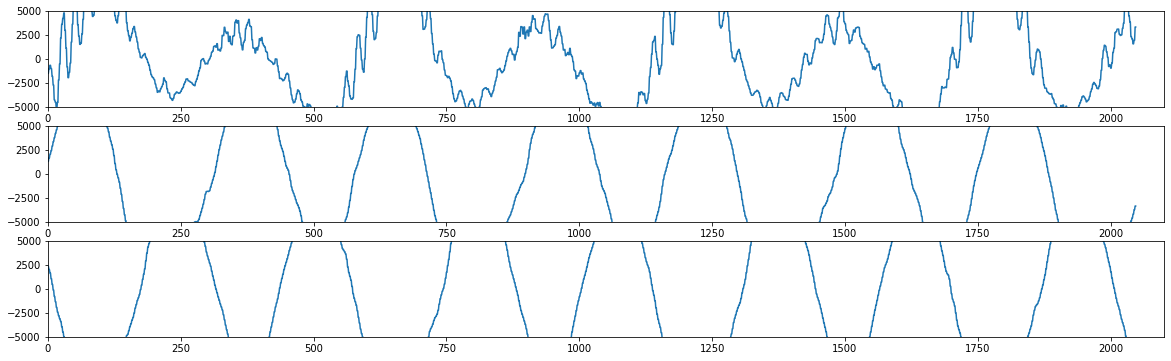

In [ ]:
plt.figure(figsize=[20,6])
plt.subplot(3,1,1)
plt.plot(y[52000:54048]) #'i'
plt.ylim(-5000,5000)
plt.xlim(0,2100)

plt.subplot(3,1,2)
plt.plot(y[78000:80048]) #voiced phoneme 'bu'
plt.ylim(-5000,5000)
plt.xlim(0,2100) #speech recognition vs. speaker recognition

plt.subplot(3,1,3)
plt.plot(y[100000:102048]) #voiced phoneme 'bu'
plt.ylim(-5000,5000)
plt.xlim(0,2100) #speech recognition vs. speaker recognition vs. emotion recognition

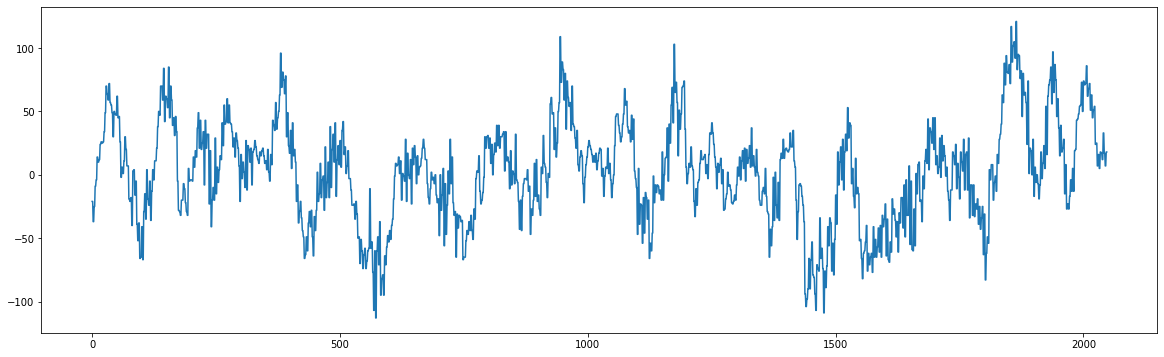

In [ ]:
plt.figure(figsize=[20,6]V)
plt.plot(y[0:2048])
#plt.ylim(-10000,15000)
#plt.xlim(-7000,160000)

(-5000.0, 160000.0)

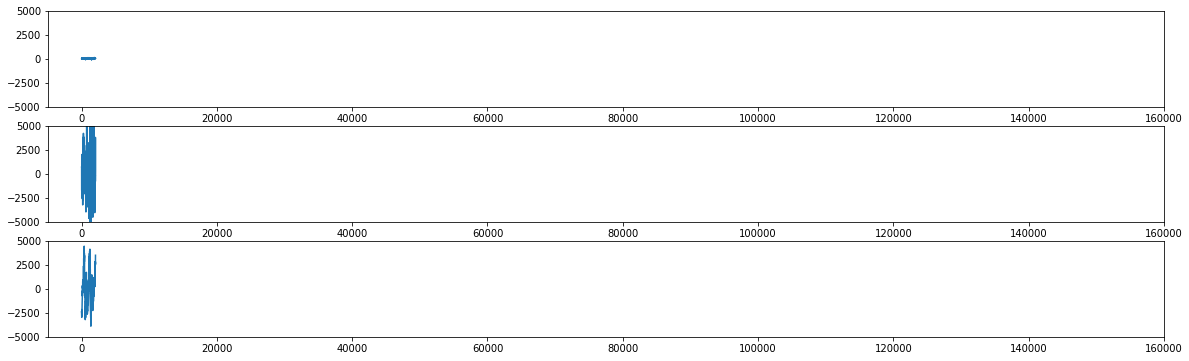

In [ ]:
plt.figure(figsize=[20,6])
plt.subplot(3,1,1)
plt.plot(y[0:2048]) #voiceless or noise ini vs. itu i2, i1 more similar i2 i1 vs. di
plt.ylim(-5000,5000)
plt.xlim(-5000,160000)
plt.subplot(3,1,2)
plt.plot(y[7000:9048]) #voiced i
plt.ylim(-5000,5000)
plt.xlim(-5000,160000) #speech recognition vs. speaker recognition
plt.subplot(3,1,3)
plt.plot(y[120000:122048]) #voiced di
plt.ylim(-5000,5000)
plt.xlim(-5000,160000) #speech recognition vs. speaker recognition vs. emotion recognitiont

In [ ]:
plt.figure(figsize=[20,6])
plt.subplot(3,1,1)
plt.plot(y[0:2048]) #voiceless or noise
plt.ylim(-5000,5000)
plt.xlim(0,2100)
plt.subplot(3,1,2)
plt.plot(y[7000:9048]) #voiced phoneme 'i'
plt.ylim(-5000,5000)
plt.xlim(0,2100) #speech recognition vs. speaker recognition
plt.subplot(3,1,3)
plt.plot(y[120000:122048]) #voiced phoneme 'd' and 'i'
plt.ylim(-5000,5000)
plt.xlim(0,2100) #speech recognition vs. speaker recognition vs. emotion recognition

(0.0, 2100.0)

In [ ]:
print (a.frame_rate) #how many samples in one second

NameError: ignored

In [ ]:
print(y[0:12])

[-21 -21 -37 -37 -25 -25  -9  -9  -4  -4  14  14]


In [ ]:
type(y)

numpy.ndarray

In [ ]:
y.dtype

dtype('int16')

In [ ]:
i=y[52000:54048] #'i'
bu=y[78000:80048] #voiced phoneme 'bu'
bu2=y[100000:102048] #voiced phoneme 'bu'

In [ ]:
print(i[0:12])
print(bu[0:12])
print(bu2[0:12])

[-1542 -1542 -1062 -1062  -697  -697 -1051 -1051 -1859 -1859 -2757 -2757]
[1284 1284 1647 1647 2035 2035 2413 2413 2886 2886 3350 3350]
[2382 2382 2012 2012 1640 1640 1057 1057  455  455 -127 -127]


In [ ]:
np.savetxt()

In [ ]:
sam=np1.loadtxt('sam.txt') #np2.loadtxt
pai=np1.loadtxt('pai.txt') #np2.loadtxt
jum=np1.loadtxt('jum.txt') #np2.loadtxt
pa=np1.loadtxt('pa.txt') #np2.loadtxt
la=np1.loadtxt('la.txt') #np2.loadtxt
gi=np1.loadtxt('gi.txt') #np2.loadtxt

In [ ]:
sam.shape

(2000,)

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.optimizers import SGD

In [ ]:
model = Sequential()
model.add(Dense(len(x[0]), activation='relu', input_shape=x[0].shape))
model.add(Dense(len(x[0]), activation='relu'))
#model.add(Dense(len(x[0]), activation='relu'))
model.add(Dense(len(y[0,:]), activation='sigmoid',)) #sigmoid, tanh, step, adam, SGD,

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
log=model.fit(x, y, validation_data=(x,y), epochs=60, batch_size=32) #1 probability as feedback

In [ ]:
p=model.predict(x)
scores = model.evaluate(x,y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
row = "| {no:<4d} [ {p1:.2f} {p2:.2f} {p3:.2f}] [ {r1:.2f} {r2:.2f} {r3:.2f}]".format
for i in range(len(x)):
    print(row(no=i, p1=p[i,0], p2=p[i,1], p3=p[i,2], r1=y[i,0], r2=y[i,1], r3=y[i,2]))

1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - accuracy: 1.0000
accuracy: 100.00%
| 0    [ 1.00 0.00 0.00] [ 1.00 0.00 0.00]
| 1    [ 0.00 1.00 0.00] [ 0.00 1.00 0.00]
| 2    [ 0.00 0.00 1.00] [ 0.00 0.00 1.00]


In [ ]:
x[1].shape

(2048,)

In [ ]:
print(x[1])

[-1134 -1134 -1166 ... -1866 -1575 -1575]


In [ ]:
print(p[0])

[1. 0. 0.]


In [ ]:
p1=model.predict(x)

1/1 [==============================] - 0s 30ms/step


In [ ]:
xt=[] #se la he
xt.append(he)
xt.append(la)
xt.append(se)

In [ ]:
x=np1.array(xt)

In [ ]:
x.shape #2x3 * 3x3 = 2x3

(3, 2048)

In [ ]:
y=np1.identity(3)

In [ ]:
y #one hot encoding
# he >> 1., 0., 0. or 1
# la >> 0., 1., 0. or 2
# se >> 0., 0., 1. or 3

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
xt=[] #se la he
xt.append(he)
xt.append(la)
xt.append(se)
xt.append(la)

In [ ]:
t=np1.array(xt)

In [ ]:
model.predict(x[1:3]) #ibu itu >> i, ib, it, u, bu, tu

1/1 [==============================] - 0s 28ms/step


array([[0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
p1=model.predict(t)

1/1 [==============================] - 0s 29ms/step


In [ ]:
p1
#array([[1., 0., 0.], >> he
       #[0., 1., 0.],
       #[0., 0., 1.], >> se
       #[0., 1., 0.]] >> la

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [ ]:
t.shape

(4, 2048)